# Project in Data Minning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## Reading the data that we collected and that we recieved from Google drive

In [3]:
path_files_folder = '/content/drive/MyDrive/data/water/'

In [4]:
from sqlalchemy.sql.base import exc
import os
import pandas as pd

# Initialize an empty list to store the dataframes
dataframes = {}
bad_files = []
# Iterate over each file in the folder
for filename in os.listdir(path_files_folder):
    if filename.endswith('.csv'):
        file_path = os.path.join(path_files_folder, filename)
        try:
          # Read the CSV file into a dataframe
          df = pd.read_csv(file_path)
          # Append the dataframe to the list
          dataframes[filename] = df
        except:
          print("bad file")
          bad_files.append(file_path)

<ipython-input-4-db53efafaa5b>:14: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [5]:
bad_files

[]

## Creating new column that has the location on each drilling site

In [6]:
monthly_data_df = dataframes["Monthly production report.csv"]
# Remove numbers before applying the regular expression
monthly_data_df['location'] = monthly_data_df['שם קידוח'].str.replace(r'\d+', '')

# Apply the regular expression pattern to extract words with at least three letters
monthly_data_df['location'] = monthly_data_df['location'].str.extractall(r'\b(\w{3,})\b').groupby(level=0).agg(' '.join)
monthly_data_df['location'] = monthly_data_df['location'].str.replace('מפ', '')
monthly_data_df['location'] = monthly_data_df['location'].str.replace('מק', '')
monthly_data_df['location'] = monthly_data_df['location'].str.replace('המלח', '')
monthly_data_df['location'] = monthly_data_df['location'].str.replace('מלח', '')
monthly_data_df['location'] = monthly_data_df['location'].str.strip()

# Print the updated DataFrame
monthly_data_df

<ipython-input-6-bd0853c34ba9>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  monthly_data_df['location'] = monthly_data_df['שם קידוח'].str.replace(r'\d+', '')


,זיהוי קידוח,שם קידוח,שנה הידרולוגית,שנה קלנדרית,חודש,"נפח שאיבה תקופתי (מ""ק)",סוג נתון,קוד תא דיווח,location
0,217001.0,מק שלהב 1,1979/1980,1980.0,1,0.0000,מאושר,752.0,שלהב
1,217001.0,מק שלהב 1,1979/1980,1980.0,2,0.0000,מאושר,752.0,שלהב
2,217001.0,מק שלהב 1,1979/1980,1980.0,3,0.0000,מאושר,752.0,שלהב
3,217001.0,מק שלהב 1,1979/1980,1980.0,4,0.0000,מאושר,752.0,שלהב
4,217001.0,מק שלהב 1,1979/1980,1980.0,5,0.0000,מאושר,752.0,שלהב
...,...,...,...,...,...,...,...,...,...
86100,99716502.0,מק צופר 221א,2021/2022,2022.0,5,134300.0000,מאושר,NaN,צופר
86101,99716502.0,מק צופר 221א,2021/2022,2022.0,6,114500.0000,מאושר,NaN,צופר
86102,NaN,NaN,NaN,NaN,Average:,45913.5003,NaN,NaN,NaN
86103,283.0,283,NaN,NaN,NaN,86102.0000,NaN,15.0,NaN


## Parsing all the csv that has a site name

In [7]:
import re

for key in dataframes.keys():
  if key == "Monthly production report.csv" or "Daily volumes and average flow at the stations" in key or "_web" in key or key == "average_by_station_month_year.csv" or key == "monthly_rain.csv" or key == "monthly_average_pressure_wind_humidity_temp.csv" or key == "avg_monthly_flow.csv":
    continue
  cur_df = dataframes[key]
  # Remove numbers before applying the regular expression
  cur_df['location'] = cur_df['Name'].str.replace(r'\d+', '')

  # Apply the regular expression pattern to extract words with at least three letters
  cur_df['location'] = cur_df['location'].str.extractall(r'\b(\w{3,})\b').groupby(level=0).agg(' '.join)

  cur_df['location'] = cur_df['location'].str.replace('מפ', '')
  cur_df['location'] = cur_df['location'].str.replace('מק', '')
  cur_df['location'] = cur_df['location'].str.replace('המלח', '')
  cur_df['location'] = cur_df['location'].str.replace('מלח', '')
  cur_df['location'] = cur_df['location'].str.strip()

  # Drop columns starting with "Unnamed"
  cur_df = cur_df.filter(regex=re.compile('^((?!Unnamed).)*$'))
  dataframes[key] = cur_df

<ipython-input-7-c238a71ac40e>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  cur_df['location'] = cur_df['Name'].str.replace(r'\d+', '')
<ipython-input-7-c238a71ac40e>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  cur_df['location'] = cur_df['Name'].str.replace(r'\d+', '')
<ipython-input-7-c238a71ac40e>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  cur_df['location'] = cur_df['Name'].str.replace(r'\d+', '')
<ipython-input-7-c238a71ac40e>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  cur_df['location'] = cur_df['Name'].str.replace(r'\d+', '')
<ipython-input-7-c238a71ac40e>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  cur_df['location'] = cur_df['Name'].str.replace(r'\d+', '')


In [8]:
keys = list(dataframes.keys())

## Creating a list of all the dataframes that contains data about the aquifers water level in order to concatanate them later on

In [9]:
prefix = 'NegevAravaWL'

result_list = [element for element in keys if element.startswith(prefix)]
result_list

['NegevAravaWL Paleo-Pleistocene fill.csv',
 'NegevAravaWL Lower Cretaceous.csv',
 'NegevAravaWL Paleo-Pleistocene fill2.csv',
 'NegevAravaWL Knoman - Toron.csv',
 'NegevAravaWL Neogene - filling.csv']

In [10]:
concat_keys = result_list
df_list = [dataframes[x] for x in concat_keys]
NegevAravaWL_df = pd.concat(df_list)
# Convert the 'Date' column to a datetime data type
NegevAravaWL_df['Date'] = pd.to_datetime(NegevAravaWL_df['Date'], format='%d-%m-%y')

# Extract day, month, and year into separate columns
NegevAravaWL_df['Day'] = NegevAravaWL_df['Date'].dt.day
NegevAravaWL_df['Month'] = NegevAravaWL_df['Date'].dt.month
NegevAravaWL_df['Year'] = NegevAravaWL_df['Date'].dt.year
NegevAravaWL_df

,Date,Name,Water level (m),Basin,Aquifer,location,Day,Month,Year
0,2004-03-15,מק יטבתה 11,56.90,נגב והערבה,קנומן בלתי מחולק,יטבתה,15,3,2004
1,2004-11-10,מק יטבתה 11,55.50,נגב והערבה,קנומן בלתי מחולק,יטבתה,10,11,2004
2,2005-04-06,מק יטבתה 11,55.10,נגב והערבה,קנומן בלתי מחולק,יטבתה,6,4,2005
3,2006-03-14,מק יטבתה 11,55.60,נגב והערבה,קנומן בלתי מחולק,יטבתה,14,3,2006
4,2006-11-23,מק יטבתה 11,55.20,נגב והערבה,קנומן בלתי מחולק,יטבתה,23,11,2006
...,...,...,...,...,...,...,...,...,...
6730,1993-03-23,מק קטורה 15,62.99,נגב והערבה,ניאוגן - מילוי,קטורה,23,3,1993
6731,1994-04-04,מק קטורה 15,63.33,נגב והערבה,ניאוגן - מילוי,קטורה,4,4,1994
6732,1994-11-07,מק קטורה 15,61.03,נגב והערבה,ניאוגן - מילוי,קטורה,7,11,1994
6733,1995-04-27,מק קטורה 15,60.73,נגב והערבה,ניאוגן - מילוי,קטורה,27,4,1995


In [11]:
NegevAravaWL_df["Year"] = NegevAravaWL_df["Year"].apply(lambda x: x - 100 if x > 2023 else x)

## Calculating the coordinates of each location using a geoloactor in order to allocate each site the closest rain and meteorological station

In [12]:
from geopy.geocoders import Nominatim

def get_coordinates(place):
    geolocator = Nominatim(user_agent='my_geocoder')  # Replace 'my_geocoder' with your desired user agent
    location = geolocator.geocode(place)

    if location is not None:
        latitude = location.latitude
        longitude = location.longitude
        return latitude, longitude
    else:
        print(f"Geocoding failed for {place}.")
        return None, None

# Example list of places
places_list = ['שלהב', 'חצבה', 'עין יהב', 'מרזבה', 'שיזף', 'עידן', 'עין חצבה', 'עין עופרים',
 'ירקעם', 'נאות הכיכר', 'אמציהו', 'סדום', 'המכתש הקטן', 'Ein Tamar, Israel', 'נחל צין', 'צורים',
 'אילת', 'עברונה', 'באר אורה', 'Timna, Israel', 'Samar, Israel', 'יטבתה', 'גרופית', 'קטורה',
 "Yahel, Israel", 'שזפון', 'Paran, Israel', 'נחל ברק', 'צופר', 'נחל עומר', 'נחל עמיעז', 'אדמון', 'Ashalim, Israel',
 'נחל זוהר', 'יעלים', 'נחל חימר', 'מצוקי דרגות', 'נאות סמדר', 'עבדת', 'עין גדי',
 'קליה',  'עובדה', 'עינות צוקים']

loc_dict = {}
loc_dict["place"] = []
loc_dict["Latitude"] = []
loc_dict["Longitude"] = []
for place in places_list:
    lat, lng = get_coordinates(place)
    if lat and lng:
        loc_dict["place"].append(place)
        loc_dict["Latitude"].append(lat)
        loc_dict["Longitude"].append(lng)
        print(f"{place}: Latitude={lat}, Longitude={lng}")

# Create DataFrame from the dictionary
loc_df = pd.DataFrame(loc_dict)


שלהב: Latitude=30.662788, Longitude=35.234167
חצבה: Latitude=30.76654235, Longitude=35.28009152182443
עין יהב: Latitude=30.65903005, Longitude=35.23678932887141
מרזבה: Latitude=30.6585601, Longitude=35.242825
שיזף: Latitude=31.0024746, Longitude=34.765577539631565
עידן: Latitude=30.8063118, Longitude=35.300586019239795
עין חצבה: Latitude=30.7982828, Longitude=35.2463979
עין עופרים: Latitude=30.612192, Longitude=34.7983556
ירקעם: Latitude=30.9381161, Longitude=35.0407372
נאות הכיכר: Latitude=30.9330032, Longitude=35.3772356
אמציהו: Latitude=30.9175477, Longitude=35.3389133
סדום: Latitude=31.674831, Longitude=34.584011
המכתש הקטן: Latitude=30.9950025, Longitude=35.209819
Ein Tamar, Israel: Latitude=30.943309, Longitude=35.3747349
נחל צין: Latitude=30.7079649, Longitude=34.7844972
צורים: Latitude=31.6676473, Longitude=35.1253478
אילת: Latitude=29.5569348, Longitude=34.9497949
עברונה: Latitude=32.0696591, Longitude=34.807553
באר אורה: Latitude=29.7101748, Longitude=34.986604
Timna, Israel:

In [13]:
loc_df

,place,Latitude,Longitude
0,שלהב,30.662788,35.234167
1,חצבה,30.766542,35.280092
2,עין יהב,30.659030,35.236789
3,מרזבה,30.658560,35.242825
4,שיזף,31.002475,34.765578
5,עידן,30.806312,35.300586
6,עין חצבה,30.798283,35.246398
7,עין עופרים,30.612192,34.798356
8,ירקעם,30.938116,35.040737
9,נאות הכיכר,30.933003,35.377236


In [14]:
locs_map = {'שלהב': 'שלהב',
 'חצבה': 'חצבה',
 'עין יהב': 'עין יהב',
 'מרזבה': 'מרזבה',
 'עין יהב אחר': 'עין יהב',
 'שיזף': 'שיזף',
 'נחל שיזף': 'שיזף',
 'עידן': 'עידן',
 'עין חצבה': 'עין חצבה',
 'עין עופרים': 'עין עופרים',
 'יורקעם':'ירקעם',
 'ירקעם': 'ירקעם',
 'נאות הכיכר':'נאות הכיכר',
 'נאות הככר':'נאות הכיכר',
 'נחל אמציה':'אמציהו',
 'אמציהו':'אמציהו',
 'ככר סדום':'סדום',
 'מכתש קטן': 'המכתש הקטן',
 'תמר': 'Ein Tamar, Israel',
 'תמר על': 'Ein Tamar, Israel',
 'תמר עלי': 'Ein Tamar, Israel',
 'צין': 'נחל צין',
 'צין על': 'נחל צין',
 'צורים': 'צורים',
 'אואזיס אילת':'אילת',
 'אילת':'אילת',
 'הארץ אילת':'אילת',
 'אילת סבחה':'אילת',
 'סבחה': 'אילת',
 'סבחה אילת':'אילת',
 'עברונה':'עברונה',
 'באר אורה':'באר אורה',
 'תמנע': 'Timna, Israel',
 'מכרות תמנע': 'Timna, Israel',
 'סמר': 'Samar, Israel',
 'תמנע צמחי השממה':'Timna, Israel',
 'צמחי השממה סמר': 'Timna, Israel',
 'יטבתה': 'יטבתה',
 'יוטבתא': 'יטבתה',
 'גרופית': 'גרופית',
 'קטורה': 'קטורה',
 'יעלון': "Yahel, Israel",
 'יעלון קטורה': "Yahel, Israel",
 'שזפון':'שזפון',
 'קדוח פארן':'Paran, Israel',
 'פארן':'Paran, Israel',
 'פארו':'Paran, Israel',
 'פארן ברק':'נחל ברק',
 'צופר': 'צופר',
 'צופר עמר': 'נחל עומר',
 'עין צופר':'צופר',
 'עמיעז':'נחל עמיעז',
 'אדמון': 'אדמון',
 'אשלים': 'Ashalim, Israel',
 'נחל זוהר': 'נחל זוהר',
 'יעלים': 'יעלים',
 'נחל חימר': 'נחל חימר',
 'מצוקי דרגות':'מצוקי דרגות',
 'נאות סמדר':'נאות סמדר',
 'עבדת':'עבדת',
 'עין גדי מרחצאות':'עין גדי',
 'עין גדי':'עין גדי',
 'סדום':'סדום',
 'קליה':'קליה',
 'עובדה':'עובדה',
 'עינות צוקים':'עינות צוקים'}

In [15]:
monthly_data_df = monthly_data_df.dropna()

In [16]:
monthly_data_df["new_location"] = monthly_data_df["location"].apply(lambda x: locs_map[x])
monthly_data_df

<ipython-input-16-a56ccea835c8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly_data_df["new_location"] = monthly_data_df["location"].apply(lambda x: locs_map[x])


,זיהוי קידוח,שם קידוח,שנה הידרולוגית,שנה קלנדרית,חודש,"נפח שאיבה תקופתי (מ""ק)",סוג נתון,קוד תא דיווח,location,new_location
0,217001.0,מק שלהב 1,1979/1980,1980.0,1,0.0,מאושר,752.0,שלהב,שלהב
1,217001.0,מק שלהב 1,1979/1980,1980.0,2,0.0,מאושר,752.0,שלהב,שלהב
2,217001.0,מק שלהב 1,1979/1980,1980.0,3,0.0,מאושר,752.0,שלהב,שלהב
3,217001.0,מק שלהב 1,1979/1980,1980.0,4,0.0,מאושר,752.0,שלהב,שלהב
4,217001.0,מק שלהב 1,1979/1980,1980.0,5,0.0,מאושר,752.0,שלהב,שלהב
...,...,...,...,...,...,...,...,...,...,...
86055,99716501.0,מק צופר 221,2021/2022,2022.0,2,0.0,מאושר,730.0,צופר,צופר
86056,99716501.0,מק צופר 221,2021/2022,2022.0,3,0.0,מאושר,730.0,צופר,צופר
86057,99716501.0,מק צופר 221,2021/2022,2022.0,4,0.0,מאושר,730.0,צופר,צופר
86058,99716501.0,מק צופר 221,2021/2022,2022.0,5,0.0,מאושר,730.0,צופר,צופר


## Merging the location dataframe we created earlier and the drilling dataframe

In [17]:
# Merge the DataFrames on different column names
merged_drilling_df = pd.merge(monthly_data_df, loc_df, left_on='new_location', right_on='place', how='inner')

# Drop the duplicate column after the merge (if needed)
merged_drilling_df.drop('place', axis=1, inplace=True)
merged_drilling_df

,זיהוי קידוח,שם קידוח,שנה הידרולוגית,שנה קלנדרית,חודש,"נפח שאיבה תקופתי (מ""ק)",סוג נתון,קוד תא דיווח,location,new_location,Latitude,Longitude
0,217001.0,מק שלהב 1,1979/1980,1980.0,1,0.0,מאושר,752.0,שלהב,שלהב,30.662788,35.234167
1,217001.0,מק שלהב 1,1979/1980,1980.0,2,0.0,מאושר,752.0,שלהב,שלהב,30.662788,35.234167
2,217001.0,מק שלהב 1,1979/1980,1980.0,3,0.0,מאושר,752.0,שלהב,שלהב,30.662788,35.234167
3,217001.0,מק שלהב 1,1979/1980,1980.0,4,0.0,מאושר,752.0,שלהב,שלהב,30.662788,35.234167
4,217001.0,מק שלהב 1,1979/1980,1980.0,5,0.0,מאושר,752.0,שלהב,שלהב,30.662788,35.234167
...,...,...,...,...,...,...,...,...,...,...,...,...
86028,99016701.0,פ צופר 4 אל עמר 4,2002/2003,2003.0,8,0.0,מאושר,752.0,צופר עמר,נחל עומר,30.535169,35.091395
86029,99016701.0,פ צופר 4 אל עמר 4,2002/2003,2003.0,9,0.0,מאושר,752.0,צופר עמר,נחל עומר,30.535169,35.091395
86030,99016701.0,פ צופר 4 אל עמר 4,2003/2004,2003.0,10,0.0,מאושר,752.0,צופר עמר,נחל עומר,30.535169,35.091395
86031,99016701.0,פ צופר 4 אל עמר 4,2003/2004,2003.0,11,0.0,מאושר,752.0,צופר עמר,נחל עומר,30.535169,35.091395


In [18]:
NegevAravaWL_df["new_location"] = NegevAravaWL_df["location"].apply(lambda x: locs_map[x])
NegevAravaWL_df

,Date,Name,Water level (m),Basin,Aquifer,location,Day,Month,Year,new_location
0,2004-03-15,מק יטבתה 11,56.90,נגב והערבה,קנומן בלתי מחולק,יטבתה,15,3,2004,יטבתה
1,2004-11-10,מק יטבתה 11,55.50,נגב והערבה,קנומן בלתי מחולק,יטבתה,10,11,2004,יטבתה
2,2005-04-06,מק יטבתה 11,55.10,נגב והערבה,קנומן בלתי מחולק,יטבתה,6,4,2005,יטבתה
3,2006-03-14,מק יטבתה 11,55.60,נגב והערבה,קנומן בלתי מחולק,יטבתה,14,3,2006,יטבתה
4,2006-11-23,מק יטבתה 11,55.20,נגב והערבה,קנומן בלתי מחולק,יטבתה,23,11,2006,יטבתה
...,...,...,...,...,...,...,...,...,...,...
6730,1993-03-23,מק קטורה 15,62.99,נגב והערבה,ניאוגן - מילוי,קטורה,23,3,1993,קטורה
6731,1994-04-04,מק קטורה 15,63.33,נגב והערבה,ניאוגן - מילוי,קטורה,4,4,1994,קטורה
6732,1994-11-07,מק קטורה 15,61.03,נגב והערבה,ניאוגן - מילוי,קטורה,7,11,1994,קטורה
6733,1995-04-27,מק קטורה 15,60.73,נגב והערבה,ניאוגן - מילוי,קטורה,27,4,1995,קטורה


In [19]:
# Merge the DataFrames on different column names
merged_NegevAravaWL_df = pd.merge(NegevAravaWL_df, loc_df, left_on='new_location', right_on='place', how='inner')

# Drop the duplicate column after the merge (if needed)
merged_NegevAravaWL_df.drop('place', axis=1, inplace=True)
merged_NegevAravaWL_df

,Date,Name,Water level (m),Basin,Aquifer,location,Day,Month,Year,new_location,Latitude,Longitude
0,2004-03-15,מק יטבתה 11,56.90,נגב והערבה,קנומן בלתי מחולק,יטבתה,15,3,2004,יטבתה,29.895920,35.059622
1,2004-11-10,מק יטבתה 11,55.50,נגב והערבה,קנומן בלתי מחולק,יטבתה,10,11,2004,יטבתה,29.895920,35.059622
2,2005-04-06,מק יטבתה 11,55.10,נגב והערבה,קנומן בלתי מחולק,יטבתה,6,4,2005,יטבתה,29.895920,35.059622
3,2006-03-14,מק יטבתה 11,55.60,נגב והערבה,קנומן בלתי מחולק,יטבתה,14,3,2006,יטבתה,29.895920,35.059622
4,2006-11-23,מק יטבתה 11,55.20,נגב והערבה,קנומן בלתי מחולק,יטבתה,23,11,2006,יטבתה,29.895920,35.059622
...,...,...,...,...,...,...,...,...,...,...,...,...
10801,1992-06-09,פ צופר 4 אל עמר 4,-6.45,נגב והערבה,ניאוגן - מילוי,צופר עמר,9,6,1992,נחל עומר,30.535169,35.091395
10802,1992-12-22,פ צופר 4 אל עמר 4,-6.10,נגב והערבה,ניאוגן - מילוי,צופר עמר,22,12,1992,נחל עומר,30.535169,35.091395
10803,1993-05-13,פ צופר 4 אל עמר 4,-6.95,נגב והערבה,ניאוגן - מילוי,צופר עמר,13,5,1993,נחל עומר,30.535169,35.091395
10804,1994-06-15,פ צופר 4 אל עמר 4,-5.65,נגב והערבה,ניאוגן - מילוי,צופר עמר,15,6,1994,נחל עומר,30.535169,35.091395


## Aggrigating the data in the water level dataframe on the site name, aquifer, year and month

In [20]:
# Group by 'Year' and 'Month' and calculate the average water level
average_water_level = merged_NegevAravaWL_df.groupby(['Name', 'Aquifer', 'Year', 'Month']).agg({'Water level (m)':'mean', 'Basin': 'first', 'location': 'first',
                                                                                                'new_location':'first', 'Latitude': 'first', 'Longitude': 'first'}).reset_index()


# Sort the DataFrame based on three columns: 'Column1', 'Column2', and 'Column3'
sorted_df = average_water_level.sort_values(by=['Name', 'Year', 'Month'], ascending=[True, True, True])

sorted_df

,Name,Aquifer,Year,Month,Water level (m),Basin,location,new_location,Latitude,Longitude
0,מק אילת 10 (סבחה),ניאוגן - מילוי,1949,11,3.68,נגב והערבה,אילת סבחה,אילת,29.556935,34.949795
1,מק אילת 10 (סבחה),ניאוגן - מילוי,1950,12,3.68,נגב והערבה,אילת סבחה,אילת,29.556935,34.949795
2,מק אילת 10 (סבחה),ניאוגן - מילוי,1952,11,3.63,נגב והערבה,אילת סבחה,אילת,29.556935,34.949795
3,מק אילת 10 (סבחה),ניאוגן - מילוי,1953,4,3.78,נגב והערבה,אילת סבחה,אילת,29.556935,34.949795
4,מק אילת 10 (סבחה),ניאוגן - מילוי,1953,12,3.71,נגב והערבה,אילת סבחה,אילת,29.556935,34.949795
...,...,...,...,...,...,...,...,...,...,...
10422,פ תמר 9 מפעלי ים מלח,קרטיקון תחתון,2016,9,-264.68,נגב והערבה,תמר עלי,"Ein Tamar, Israel",30.943309,35.374735
10423,פ תמר 9 מפעלי ים מלח,קרטיקון תחתון,2018,1,-263.89,נגב והערבה,תמר עלי,"Ein Tamar, Israel",30.943309,35.374735
10424,פ תמר 9 מפעלי ים מלח,קרטיקון תחתון,2019,11,-266.44,נגב והערבה,תמר עלי,"Ein Tamar, Israel",30.943309,35.374735
10425,פ תמר 9 מפעלי ים מלח,קרטיקון תחתון,2020,10,-265.73,נגב והערבה,תמר עלי,"Ein Tamar, Israel",30.943309,35.374735


In [21]:
file_name = "average_by_station_month_year.csv"
station_month_year_df = pd.read_csv(path_files_folder + file_name)

# Drop columns starting with "Unnamed"
station_month_year_df = station_month_year_df.filter(regex=re.compile('^((?!Unnamed).)*$'))

station_month_year_df

,new station,month,year,max temp,min temp,near ground temp,Cumulative evaporation 12 hours (mm),Daily evaporation from A tub (mm),Duration of sun exposure (minutes)
0,אילת,1,1980,20.719355,8.861290,7.204609,2.887097,3.961290,466.965673
1,אילת,1,1981,19.841935,9.022581,6.258065,2.496774,3.641935,437.225806
2,אילת,1,1982,21.383871,10.316129,8.857604,2.879255,3.654839,464.509924
3,אילת,1,1983,18.048387,7.293548,5.433641,2.303226,3.196774,384.901157
4,אילת,1,1984,21.087097,8.861290,7.101383,2.359900,3.523103,440.903226
...,...,...,...,...,...,...,...,...,...
3703,שדה בוקר,12,2018,21.210659,9.450945,7.308700,11.000000,5.020875,NaN
3704,שדה בוקר,12,2019,21.609046,8.892881,6.674829,11.000000,5.101957,NaN
3705,שדה בוקר,12,2020,22.307433,9.386429,7.187733,11.000000,4.915162,NaN
3706,שדה בוקר,12,2021,21.476788,9.447720,7.274829,11.000000,5.155183,NaN


In [22]:
station_month_year_df["new new station"] = station_month_year_df["new station"].apply(lambda x: locs_map[x] if x in locs_map.keys() else x)

In [23]:
# Merge the DataFrames on different column names
station_month_year_with_loc_df = pd.merge(station_month_year_df, loc_df, left_on='new new station', right_on='place', how='inner')
station_month_year_with_loc_df

,new station,month,year,max temp,min temp,near ground temp,Cumulative evaporation 12 hours (mm),Daily evaporation from A tub (mm),Duration of sun exposure (minutes),new new station,place,Latitude,Longitude
0,אילת,1,1980,20.719355,8.861290,7.204609,2.887097,3.961290,466.965673,אילת,אילת,29.556935,34.949795
1,אילת,1,1981,19.841935,9.022581,6.258065,2.496774,3.641935,437.225806,אילת,אילת,29.556935,34.949795
2,אילת,1,1982,21.383871,10.316129,8.857604,2.879255,3.654839,464.509924,אילת,אילת,29.556935,34.949795
3,אילת,1,1983,18.048387,7.293548,5.433641,2.303226,3.196774,384.901157,אילת,אילת,29.556935,34.949795
4,אילת,1,1984,21.087097,8.861290,7.101383,2.359900,3.523103,440.903226,אילת,אילת,29.556935,34.949795
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2980,פארן,12,2018,20.770968,9.500000,8.322581,NaN,9.744359,NaN,"Paran, Israel","Paran, Israel",30.362544,35.154774
2981,פארן,12,2019,21.496774,9.067742,7.867742,NaN,9.744359,NaN,"Paran, Israel","Paran, Israel",30.362544,35.154774
2982,פארן,12,2020,22.416129,8.577419,7.080645,NaN,9.744359,NaN,"Paran, Israel","Paran, Israel",30.362544,35.154774
2983,פארן,12,2021,21.054839,9.151613,8.154839,NaN,9.744359,NaN,"Paran, Israel","Paran, Israel",30.362544,35.154774


## Assigning the closest meteorological station by choosing the closest one to the current site

In [24]:
import numpy as np
import pandas as pd

station_list = station_month_year_df["new station"].unique().tolist()
# Get distinct rows where the 'name' column matches any of the names in the list
distinct_rows = station_month_year_with_loc_df[station_month_year_with_loc_df['new station'].isin(station_list)][['Latitude', 'Longitude']].drop_duplicates()
# Coordinates of the 9 points (shape: (9, 2))
nine_points = distinct_rows.values
# print(nine_points)

# Calculate the distance between each n point and each of the 9 points
distances = np.linalg.norm(sorted_df[['Latitude', 'Longitude']].values[:, np.newaxis] - nine_points, axis=2)

# Find the index of the closest point for each n point
closest_indices = np.argmin(distances, axis=1)
# Create a new column in the DataFrame called "designated_station"
sorted_df['designated_station'] = closest_indices

sorted_df['designated_station'] = sorted_df['designated_station'].apply(lambda x: station_list[x])

sorted_df


,Name,Aquifer,Year,Month,Water level (m),Basin,location,new_location,Latitude,Longitude,designated_station
0,מק אילת 10 (סבחה),ניאוגן - מילוי,1949,11,3.68,נגב והערבה,אילת סבחה,אילת,29.556935,34.949795,אילת
1,מק אילת 10 (סבחה),ניאוגן - מילוי,1950,12,3.68,נגב והערבה,אילת סבחה,אילת,29.556935,34.949795,אילת
2,מק אילת 10 (סבחה),ניאוגן - מילוי,1952,11,3.63,נגב והערבה,אילת סבחה,אילת,29.556935,34.949795,אילת
3,מק אילת 10 (סבחה),ניאוגן - מילוי,1953,4,3.78,נגב והערבה,אילת סבחה,אילת,29.556935,34.949795,אילת
4,מק אילת 10 (סבחה),ניאוגן - מילוי,1953,12,3.71,נגב והערבה,אילת סבחה,אילת,29.556935,34.949795,אילת
...,...,...,...,...,...,...,...,...,...,...,...
10422,פ תמר 9 מפעלי ים מלח,קרטיקון תחתון,2016,9,-264.68,נגב והערבה,תמר עלי,"Ein Tamar, Israel",30.943309,35.374735,חצבה
10423,פ תמר 9 מפעלי ים מלח,קרטיקון תחתון,2018,1,-263.89,נגב והערבה,תמר עלי,"Ein Tamar, Israel",30.943309,35.374735,חצבה
10424,פ תמר 9 מפעלי ים מלח,קרטיקון תחתון,2019,11,-266.44,נגב והערבה,תמר עלי,"Ein Tamar, Israel",30.943309,35.374735,חצבה
10425,פ תמר 9 מפעלי ים מלח,קרטיקון תחתון,2020,10,-265.73,נגב והערבה,תמר עלי,"Ein Tamar, Israel",30.943309,35.374735,חצבה


## Parsing the rain station data

In [25]:
file_name = "monthly_rain.csv"
monthly_rain_df = pd.read_csv(path_files_folder + file_name)

# Drop columns starting with "Unnamed"
monthly_rain_df = monthly_rain_df.filter(regex=re.compile('^((?!Unnamed).)*$'))

monthly_rain_df = monthly_rain_df[monthly_rain_df["תחנה חדש"] != "קליה"]

monthly_rain_df["תחנה חדש"].unique().tolist()

['בוקר',
 'עבדת',
 'מצפה רמון',
 'סדום',
 'יטבתה',
 'אילת',
 'עין יהב',
 'חצבה',
 'פארן',
 'נאות סמדר']

In [26]:
monthly_rain_df["new_station"] = monthly_rain_df["תחנה חדש"].apply(lambda x: locs_map[x] if x in locs_map.keys() else x)
monthly_rain_df

,"כמות הגשם החודשית (מ""מ)",מספר ימי גשם בחודש (מספר),היום עם כמות הגשם המקסימלית (יום),"כמות יומית מקסימלית (מ""מ)",תחנה חדש,month,year,new_station
0,19.4,6.0,23.0,13.5,בוקר,1,1980,בוקר
1,8.0,3.0,23.0,7.0,עבדת,1,1980,עבדת
2,10.4,4.0,23.0,5.6,מצפה רמון,1,1980,מצפה רמון
3,5.5,2.0,23.0,4.0,סדום,1,1980,סדום
4,1.5,1.0,23.0,1.5,יטבתה,1,1980,יטבתה
...,...,...,...,...,...,...,...,...
3879,0.0,0.0,NaN,0.0,סדום,7,2023,סדום
3880,0.0,0.0,NaN,0.0,חצבה,7,2023,חצבה
3881,0.0,0.0,NaN,0.0,פארן,7,2023,"Paran, Israel"
3882,0.0,0.0,NaN,0.0,יטבתה,7,2023,יטבתה


In [27]:
# Merge the DataFrames on different column names
monthly_rain_with_loc_df = pd.merge(monthly_rain_df, loc_df, left_on='new_station', right_on='place', how='inner')
monthly_rain_with_loc_df

,"כמות הגשם החודשית (מ""מ)",מספר ימי גשם בחודש (מספר),היום עם כמות הגשם המקסימלית (יום),"כמות יומית מקסימלית (מ""מ)",תחנה חדש,month,year,new_station,place,Latitude,Longitude
0,8.0,3.0,23.0,7.0,עבדת,1,1980,עבדת,עבדת,30.794096,34.773182
1,21.8,10.0,24.0,5.8,עבדת,2,1980,עבדת,עבדת,30.794096,34.773182
2,15.8,4.0,2.0,8.2,עבדת,3,1980,עבדת,עבדת,30.794096,34.773182
3,2.5,2.0,1.0,1.5,עבדת,4,1980,עבדת,עבדת,30.794096,34.773182
4,0.0,0.0,NaN,0.0,עבדת,5,1980,עבדת,עבדת,30.794096,34.773182
...,...,...,...,...,...,...,...,...,...,...,...
2903,22.4,3.0,10.0,22.0,נאות סמדר,4,2023,נאות סמדר,נאות סמדר,30.048644,35.025735
2904,7.7,2.0,27.0,5.0,נאות סמדר,5,2023,נאות סמדר,נאות סמדר,30.048644,35.025735
2905,7.4,2.0,27.0,4.7,נאות סמדר,5,2023,נאות סמדר,נאות סמדר,30.048644,35.025735
2906,0.7,2.0,9.0,0.6,נאות סמדר,6,2023,נאות סמדר,נאות סמדר,30.048644,35.025735


## Assigning the closest rain station by choosing the closest one to the current site



In [28]:
rain_station_list = monthly_rain_df["תחנה חדש"].unique().tolist()
# Get distinct rows where the 'name' column matches any of the names in the list
distinct_rows = monthly_rain_with_loc_df[monthly_rain_with_loc_df['new_station'].isin(rain_station_list)][['Latitude', 'Longitude']].drop_duplicates()
# print(distinct_rows)
# Coordinates of the 9 points (shape: (9, 2))
nine_points = distinct_rows.values
# print(nine_points)

# Calculate the distance between each n point and each of the 9 points
distances = np.linalg.norm(sorted_df[['Latitude', 'Longitude']].values[:, np.newaxis] - nine_points, axis=2)

# Find the index of the closest point for each n point
closest_indices = np.argmin(distances, axis=1)
# Create a new column in the DataFrame called "designated_rain_station"
sorted_df['designated_rain_station'] = closest_indices

sorted_df['designated_rain_station'] = sorted_df['designated_rain_station'].apply(lambda x: rain_station_list[x])

sorted_df

,Name,Aquifer,Year,Month,Water level (m),Basin,location,new_location,Latitude,Longitude,designated_station,designated_rain_station
0,מק אילת 10 (סבחה),ניאוגן - מילוי,1949,11,3.68,נגב והערבה,אילת סבחה,אילת,29.556935,34.949795,אילת,סדום
1,מק אילת 10 (סבחה),ניאוגן - מילוי,1950,12,3.68,נגב והערבה,אילת סבחה,אילת,29.556935,34.949795,אילת,סדום
2,מק אילת 10 (סבחה),ניאוגן - מילוי,1952,11,3.63,נגב והערבה,אילת סבחה,אילת,29.556935,34.949795,אילת,סדום
3,מק אילת 10 (סבחה),ניאוגן - מילוי,1953,4,3.78,נגב והערבה,אילת סבחה,אילת,29.556935,34.949795,אילת,סדום
4,מק אילת 10 (סבחה),ניאוגן - מילוי,1953,12,3.71,נגב והערבה,אילת סבחה,אילת,29.556935,34.949795,אילת,סדום
...,...,...,...,...,...,...,...,...,...,...,...,...
10422,פ תמר 9 מפעלי ים מלח,קרטיקון תחתון,2016,9,-264.68,נגב והערבה,תמר עלי,"Ein Tamar, Israel",30.943309,35.374735,חצבה,אילת
10423,פ תמר 9 מפעלי ים מלח,קרטיקון תחתון,2018,1,-263.89,נגב והערבה,תמר עלי,"Ein Tamar, Israel",30.943309,35.374735,חצבה,אילת
10424,פ תמר 9 מפעלי ים מלח,קרטיקון תחתון,2019,11,-266.44,נגב והערבה,תמר עלי,"Ein Tamar, Israel",30.943309,35.374735,חצבה,אילת
10425,פ תמר 9 מפעלי ים מלח,קרטיקון תחתון,2020,10,-265.73,נגב והערבה,תמר עלי,"Ein Tamar, Israel",30.943309,35.374735,חצבה,אילת


## Reading the data on the pressure, wind, humidity and temperature

In [29]:
file_name = "monthly_average_pressure_wind_humidity_temp.csv"
pressure_wind_humidity_temp_df = pd.read_csv(path_files_folder + file_name)

# Drop columns starting with "Unnamed"
pressure_wind_humidity_temp_df = pressure_wind_humidity_temp_df.filter(regex=re.compile('^((?!Unnamed).)*$'))

pressure_wind_humidity_temp_df

,new station,month,year,Pressure at station height (hectoscale),Pressure at sea level (hectoscale),Temperature (C°),Humid temperature (C°),Dew point temperature (C°),Relative humidity (%),Wind direction (degrees),Wind speed (meters per second)
0,אילת,1,1980,1017.968260,1018.268664,14.516071,9.091935,1.955530,45.675691,162.597926,3.214862
1,אילת,1,1981,1015.585081,1015.885484,14.586290,9.011694,1.538710,43.899194,170.362903,2.155242
2,אילת,1,1982,1016.315323,1016.624194,15.759677,10.146371,2.943145,45.520161,165.080645,3.659274
3,אילת,1,1983,1020.017339,1020.323387,12.922984,7.687673,0.264286,44.062788,107.344470,3.088134
4,אילת,1,1984,1017.877419,1018.177419,15.322581,9.683468,2.585484,44.895161,97.741935,3.193548
...,...,...,...,...,...,...,...,...,...,...,...
1258,פארן,11,2001,NaN,NaN,18.134231,12.188173,5.955673,48.365385,153.230769,1.591346
1259,פארן,12,1997,NaN,NaN,13.942166,10.341866,6.701002,64.723733,171.722350,1.826325
1260,פארן,12,1998,NaN,NaN,14.174309,9.894124,5.131797,57.106567,181.653226,1.681452
1261,פארן,12,1999,NaN,NaN,12.957488,8.840841,3.824194,57.319700,182.943548,1.588710


## Reading the data on the river flow on the rivers in the Arava and Negev

In [30]:
file_name = "avg_monthly_flow.csv"
river_flow_df = pd.read_csv(path_files_folder + file_name)

# Drop columns starting with "Unnamed"
river_flow_df = river_flow_df.filter(regex=re.compile('^((?!Unnamed).)*$'))

river_flow_df

,station name,month,year,daily volume (cubic meter),Average daily flow (cubic meters/second)
0,NEQAROT - UPPER,1,1988,0.000000,0.000000
1,NEQAROT - UPPER,1,1989,0.000000,0.000000
2,NEQAROT - UPPER,1,1990,0.000000,0.000000
3,NEQAROT - UPPER,1,1991,0.000000,0.000000
4,NEQAROT - UPPER,1,1992,414.255161,0.004839
...,...,...,...,...,...
4026,ZIN - MASOS,8,2021,0.000000,0.000000
4027,ZIN - MASOS,9,2021,0.000000,0.000000
4028,ZIN - MASOS,10,2020,0.000000,0.000000
4029,ZIN - MASOS,11,2020,0.000000,0.000000


In [31]:
river_list = ['ARUGOT',
              'DARGA',
              'PARAN - THE BOTTLENECK',
              'PARAN - WESTERN BORDER',
              'PEHAMI',
              "YA'ALON - KIBBUZ YAHAL",
              'ZIHOR',
              'ZIN - MASOS',
              'ZIN - WATERFALL',
              'ZIN - WEST OF ARAVA ROAD',
              "ZIN UPPER - 'AVEDAT",
              'ARAVA - EN YAHAV RESERVOIR',
              'ARAVA-HAZAVA',
              'ARUGOT - UP HIGHWAY 90',
              'ASHALIM CANAL',
              'ASHALIM UPSTREAM',
              'BOQEQ',
              'EMZIYAHY-TAMAR SPRING UPSTREAM',
              'HEMAR - DOWNSTREAM THE CLIFF',
              'PARAN - ARAVA ROAD',
              'SOUTH ARAVA-YAEL',
              'TIMNA - PARK',
              'TZIN - ARAVA ROAD',
              'ZIN-UPSTREAM FROM WATERFALL',
              'TMARIM',
              "AMMI'AZ",
              "RAHAM",
              "MASOR",
              "AROD",
              "NEQAROT - UPPER",
              "UBA",
              "HIYON- 40 ROAD",
              'ADMON']

## Merge the datasets that we created in the previous sections

In [32]:
# Merge based on different columns from each DataFrame
merged_df = pd.merge(sorted_df, station_month_year_df, left_on=["new_location", "Year", "Month"], right_on=["new station", "year", "month"], how='left')
merged_df.head()

,Name,Aquifer,Year,Month,Water level (m),Basin,location,new_location,Latitude,Longitude,...,new station,month,year,max temp,min temp,near ground temp,Cumulative evaporation 12 hours (mm),Daily evaporation from A tub (mm),Duration of sun exposure (minutes),new new station
0,מק אילת 10 (סבחה),ניאוגן - מילוי,1949,11,3.68,נגב והערבה,אילת סבחה,אילת,29.556935,34.949795,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,מק אילת 10 (סבחה),ניאוגן - מילוי,1950,12,3.68,נגב והערבה,אילת סבחה,אילת,29.556935,34.949795,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,מק אילת 10 (סבחה),ניאוגן - מילוי,1952,11,3.63,נגב והערבה,אילת סבחה,אילת,29.556935,34.949795,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,מק אילת 10 (סבחה),ניאוגן - מילוי,1953,4,3.78,נגב והערבה,אילת סבחה,אילת,29.556935,34.949795,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,מק אילת 10 (סבחה),ניאוגן - מילוי,1953,12,3.71,נגב והערבה,אילת סבחה,אילת,29.556935,34.949795,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
# Merge based on different columns from each DataFrame
new_merged_df = pd.merge(merged_df, monthly_rain_df, left_on=["new_location", "Year", "Month"], right_on=["תחנה חדש", "year", "month"], how='left')
new_merged_df.head()

,Name,Aquifer,Year,Month,Water level (m),Basin,location,new_location,Latitude,Longitude,...,Duration of sun exposure (minutes),new new station,"כמות הגשם החודשית (מ""מ)",מספר ימי גשם בחודש (מספר),היום עם כמות הגשם המקסימלית (יום),"כמות יומית מקסימלית (מ""מ)",תחנה חדש,month_y,year_y,new_station
0,מק אילת 10 (סבחה),ניאוגן - מילוי,1949,11,3.68,נגב והערבה,אילת סבחה,אילת,29.556935,34.949795,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,מק אילת 10 (סבחה),ניאוגן - מילוי,1950,12,3.68,נגב והערבה,אילת סבחה,אילת,29.556935,34.949795,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,מק אילת 10 (סבחה),ניאוגן - מילוי,1952,11,3.63,נגב והערבה,אילת סבחה,אילת,29.556935,34.949795,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,מק אילת 10 (סבחה),ניאוגן - מילוי,1953,4,3.78,נגב והערבה,אילת סבחה,אילת,29.556935,34.949795,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,מק אילת 10 (סבחה),ניאוגן - מילוי,1953,12,3.71,נגב והערבה,אילת סבחה,אילת,29.556935,34.949795,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
# Merge based on different columns from each DataFrame
new_merged_df = pd.merge(new_merged_df, pressure_wind_humidity_temp_df, left_on=["new_location", "Year", "Month"], right_on=["new station", "year", "month"], how='left')
new_merged_df.head()

,Name,Aquifer,Year,Month,Water level (m),Basin,location,new_location,Latitude,Longitude,...,month,year,Pressure at station height (hectoscale),Pressure at sea level (hectoscale),Temperature (C°),Humid temperature (C°),Dew point temperature (C°),Relative humidity (%),Wind direction (degrees),Wind speed (meters per second)
0,מק אילת 10 (סבחה),ניאוגן - מילוי,1949,11,3.68,נגב והערבה,אילת סבחה,אילת,29.556935,34.949795,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,מק אילת 10 (סבחה),ניאוגן - מילוי,1950,12,3.68,נגב והערבה,אילת סבחה,אילת,29.556935,34.949795,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,מק אילת 10 (סבחה),ניאוגן - מילוי,1952,11,3.63,נגב והערבה,אילת סבחה,אילת,29.556935,34.949795,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,מק אילת 10 (סבחה),ניאוגן - מילוי,1953,4,3.78,נגב והערבה,אילת סבחה,אילת,29.556935,34.949795,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,מק אילת 10 (סבחה),ניאוגן - מילוי,1953,12,3.71,נגב והערבה,אילת סבחה,אילת,29.556935,34.949795,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
# Merge based on different columns from each DataFrame
new_new_merged_df = pd.merge(new_merged_df, monthly_data_df, left_on=["new_location", "Year", "Month"], right_on=["new_location", "שנה קלנדרית", "חודש"], how='left')
new_new_merged_df

,Name,Aquifer,Year,Month,Water level (m),Basin,location_x,new_location,Latitude,Longitude,...,Wind speed (meters per second),זיהוי קידוח,שם קידוח,שנה הידרולוגית,שנה קלנדרית,חודש,"נפח שאיבה תקופתי (מ""ק)",סוג נתון,קוד תא דיווח,location_y
0,מק אילת 10 (סבחה),ניאוגן - מילוי,1949,11,3.68,נגב והערבה,אילת סבחה,אילת,29.556935,34.949795,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,מק אילת 10 (סבחה),ניאוגן - מילוי,1950,12,3.68,נגב והערבה,אילת סבחה,אילת,29.556935,34.949795,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,מק אילת 10 (סבחה),ניאוגן - מילוי,1952,11,3.63,נגב והערבה,אילת סבחה,אילת,29.556935,34.949795,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,מק אילת 10 (סבחה),ניאוגן - מילוי,1953,4,3.78,נגב והערבה,אילת סבחה,אילת,29.556935,34.949795,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,מק אילת 10 (סבחה),ניאוגן - מילוי,1953,12,3.71,נגב והערבה,אילת סבחה,אילת,29.556935,34.949795,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57212,פ תמר 9 מפעלי ים מלח,קרטיקון תחתון,2021,11,-267.35,נגב והערבה,תמר עלי,"Ein Tamar, Israel",30.943309,35.374735,...,NaN,4217802.0,פ תמר 5 א,2021/2022,2021.0,11,11510.0,מאושר,730.0,תמר
57213,פ תמר 9 מפעלי ים מלח,קרטיקון תחתון,2021,11,-267.35,נגב והערבה,תמר עלי,"Ein Tamar, Israel",30.943309,35.374735,...,NaN,4317802.0,פ תמר 3א מפ ים המלח,2021/2022,2021.0,11,36110.0,מאושר,710.0,תמר
57214,פ תמר 9 מפעלי ים מלח,קרטיקון תחתון,2021,11,-267.35,נגב והערבה,תמר עלי,"Ein Tamar, Israel",30.943309,35.374735,...,NaN,4317803.0,פ תמר 9 מפעלי ים מלח,2021/2022,2021.0,11,14749.0,מאושר,710.0,תמר עלי
57215,פ תמר 9 מפעלי ים מלח,קרטיקון תחתון,2021,11,-267.35,נגב והערבה,תמר עלי,"Ein Tamar, Israel",30.943309,35.374735,...,NaN,4317804.0,פ תמר 10 מפ ים המלח,2021/2022,2021.0,11,0.0,מאושר,730.0,תמר


### Filtering unnecessary columns

In [36]:
new_new_merged_df.columns

Index(['Name', 'Aquifer', 'Year', 'Month', 'Water level (m)', 'Basin',
       'location_x', 'new_location', 'Latitude', 'Longitude',
       'designated_station', 'designated_rain_station', 'new station_x',
       'month_x', 'year_x', 'max temp', 'min temp', 'near ground temp',
       'Cumulative evaporation 12 hours (mm)',
       'Daily evaporation from A tub (mm)',
       'Duration of sun exposure (minutes)', 'new new station',
       'כמות הגשם החודשית (מ"מ)', 'מספר ימי גשם בחודש (מספר)',
       'היום עם כמות הגשם המקסימלית (יום)', 'כמות יומית מקסימלית (מ"מ)',
       'תחנה חדש', 'month_y', 'year_y', 'new_station', 'new station_y',
       'month', 'year', 'Pressure at station height (hectoscale)',
       'Pressure at sea level (hectoscale)', 'Temperature (C°)',
       'Humid temperature (C°)', 'Dew point temperature (C°)',
       'Relative humidity (%)', 'Wind direction (degrees)',
       'Wind speed (meters per second)', 'זיהוי קידוח', 'שם קידוח',
       'שנה הידרולוגית', 'שנה קלנדרי

In [37]:
new_new_merged_df = new_new_merged_df[['Name', 'Aquifer', 'Year', 'Month',
       'designated_station', 'designated_rain_station', 'max temp', 'min temp', 'near ground temp',
       'Cumulative evaporation 12 hours (mm)',
       'Daily evaporation from A tub (mm)', 'Duration of sun exposure (minutes)',
       'כמות הגשם החודשית (מ"מ)', 'מספר ימי גשם בחודש (מספר)',
       'היום עם כמות הגשם המקסימלית (יום)', 'כמות יומית מקסימלית (מ"מ)', 'Pressure at station height (hectoscale)',
       'Pressure at sea level (hectoscale)', 'Temperature (C°)',
       'Humid temperature (C°)', 'Dew point temperature (C°)',
       'Relative humidity (%)', 'Wind direction (degrees)',
       'Wind speed (meters per second)', 'נפח שאיבה תקופתי (מ"ק)', 'Water level (m)']]

new_new_merged_df.head()

,Name,Aquifer,Year,Month,designated_station,designated_rain_station,max temp,min temp,near ground temp,Cumulative evaporation 12 hours (mm),...,Pressure at station height (hectoscale),Pressure at sea level (hectoscale),Temperature (C°),Humid temperature (C°),Dew point temperature (C°),Relative humidity (%),Wind direction (degrees),Wind speed (meters per second),"נפח שאיבה תקופתי (מ""ק)",Water level (m)
0,מק אילת 10 (סבחה),ניאוגן - מילוי,1949,11,אילת,סדום,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.68
1,מק אילת 10 (סבחה),ניאוגן - מילוי,1950,12,אילת,סדום,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.68
2,מק אילת 10 (סבחה),ניאוגן - מילוי,1952,11,אילת,סדום,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.63
3,מק אילת 10 (סבחה),ניאוגן - מילוי,1953,4,אילת,סדום,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.78
4,מק אילת 10 (סבחה),ניאוגן - מילוי,1953,12,אילת,סדום,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.71


### removing the duplicates in the merged dataframe

In [38]:
new_new_merged_df.drop_duplicates(["Name", 'designated_station', 'designated_rain_station']).reset_index(drop=True)[["Name", 'designated_station',	'designated_rain_station']]


,Name,designated_station,designated_rain_station
0,מק אילת 10 (סבחה),אילת,סדום
1,מק אילת 101,אילת,סדום
2,מק אילת 102,אילת,סדום
3,מק אילת 103,אילת,סדום
4,מק אילת 106,אילת,סדום
...,...,...,...
225,פ תמר 5 מפ ים המלח,חצבה,אילת
226,פ תמר 6 מפ ים המלח,חצבה,אילת
227,פ תמר 7 מפ ים המלח,חצבה,אילת
228,פ תמר 8 מפ ים המלח,חצבה,אילת


## Reading the excel file that contains the allocation of each site to 2 meteorological stations and 2 rain stations provided to us by Avshalom

In [39]:
import pandas as pd
df_river_drills = pd.read_excel(path_files_folder + "Drilling_with_rivers.xlsx")
df_river_drills = df_river_drills.dropna()

In [40]:
river_map_locations = {'ARAVA - EN YAHAV RESERVOIR':'ARAVA - EN YAHAV RESERVOIR',
                        'מסור': "MASOR",
                        'נקרות עליון': "NEQAROT - UPPER",
                        'PARAN - ARAVA ROAD': 'PARAN - ARAVA ROAD',
                        'ARAVA-HAZAVA': 'ARAVA-HAZAVA',
                        'ZIN - MASOS': 'ZIN - MASOS',
                        'EMZIYAHY-TAMAR SPRING UPSTREAM': 'EMZIYAHY-TAMAR SPRING UPSTREAM',
                        'TZIN - ARAVA ROAD':'TZIN - ARAVA ROAD',
                        'רחם':"RAHAM",
                        'TIMNA - PARK':'TIMNA - PARK',
                        'ZIHOR':'ZIHOR',
                        "YA'ALON - KIBBUZ YAHAL":"YA'ALON - KIBBUZ YAHAL",
                        'PARAN - THE BOTTLENECK':'PARAN - THE BOTTLENECK',
                        'ערוד':"AROD",
                        'ARAVA - EN YAHAV RESERVOIR':'ARAVA - EN YAHAV RESERVOIR',
                        'עובא': "UBA",
                        'ASHALIM CANAL':'ASHALIM CANAL',
                        'SOUTH ARAVA-YAEL':'SOUTH ARAVA-YAEL',
                        'הערבה הדרומית - יהל':'SOUTH ARAVA-YAEL',
                        'חיון':"HIYON- 40 ROAD"}

## Trying to fill the water level missing data which created an overfitted model and thats why we didnot used this code later on

In [41]:
# Create a complete date range
min_year = NegevAravaWL_df['Year'].min()
max_year = NegevAravaWL_df['Year'].max()
complete_dates = pd.date_range(start=f'{min_year}-01', end=f'{max_year}-12', freq='MS')

# Convert complete_dates to DataFrame with 'year' and 'month' columns
complete_dates_df = pd.DataFrame({'Year': complete_dates.year, 'Month': complete_dates.month})

# Create a DataFrame with "Name" and "Aquifer" columns
site_aquifer_df = NegevAravaWL_df[["Name"]].drop_duplicates()

# Create a cross join between "Name", "Aquifer", and the complete date range
cross_joined_df = pd.merge(site_aquifer_df.assign(key=1), complete_dates_df.assign(key=1), on='key').drop(columns='key')

# Merge based on different columns from each DataFrame
drills_and_stations_df = pd.merge(cross_joined_df, NegevAravaWL_df, on=["Name", "Year", "Month"], how='left')

df_list = []
for name in drills_and_stations_df["Name"].unique():
  cur_df = drills_and_stations_df[drills_and_stations_df["Name"] == name]
  cur_df = cur_df.fillna(method='ffill')
  cur_df = cur_df.fillna(method='bfill')
  df_list.append(cur_df)

final_df = pd.concat(df_list)
final_df = final_df.drop(columns=["Date", "Basin", "Day", "location", "new_location"])
final_df

,Name,Year,Month,Water level (m),Aquifer
0,מק יטבתה 11,1949,1,65.20,קנומן בלתי מחולק
1,מק יטבתה 11,1949,2,65.20,קנומן בלתי מחולק
2,מק יטבתה 11,1949,3,65.20,קנומן בלתי מחולק
3,מק יטבתה 11,1949,4,65.20,קנומן בלתי מחולק
4,מק יטבתה 11,1949,5,65.20,קנומן בלתי מחולק
...,...,...,...,...,...
207374,מק תמנע 4,2023,8,34.36,ניאוגן - מילוי
207375,מק תמנע 4,2023,9,34.36,ניאוגן - מילוי
207376,מק תמנע 4,2023,10,34.36,ניאוגן - מילוי
207377,מק תמנע 4,2023,11,34.36,ניאוגן - מילוי


## Using the original water level data and not filling the missing months

In [42]:
final_df = NegevAravaWL_df
final_df

,Date,Name,Water level (m),Basin,Aquifer,location,Day,Month,Year,new_location
0,2004-03-15,מק יטבתה 11,56.90,נגב והערבה,קנומן בלתי מחולק,יטבתה,15,3,2004,יטבתה
1,2004-11-10,מק יטבתה 11,55.50,נגב והערבה,קנומן בלתי מחולק,יטבתה,10,11,2004,יטבתה
2,2005-04-06,מק יטבתה 11,55.10,נגב והערבה,קנומן בלתי מחולק,יטבתה,6,4,2005,יטבתה
3,2006-03-14,מק יטבתה 11,55.60,נגב והערבה,קנומן בלתי מחולק,יטבתה,14,3,2006,יטבתה
4,2006-11-23,מק יטבתה 11,55.20,נגב והערבה,קנומן בלתי מחולק,יטבתה,23,11,2006,יטבתה
...,...,...,...,...,...,...,...,...,...,...
6730,1993-03-23,מק קטורה 15,62.99,נגב והערבה,ניאוגן - מילוי,קטורה,23,3,1993,קטורה
6731,1994-04-04,מק קטורה 15,63.33,נגב והערבה,ניאוגן - מילוי,קטורה,4,4,1994,קטורה
6732,1994-11-07,מק קטורה 15,61.03,נגב והערבה,ניאוגן - מילוי,קטורה,7,11,1994,קטורה
6733,1995-04-27,מק קטורה 15,60.73,נגב והערבה,ניאוגן - מילוי,קטורה,27,4,1995,קטורה


## Merging the drilling dataframe with the data that Avshalom provided us

In [43]:
# Merge based on different columns from each DataFrame
drills_and_stations = pd.merge(monthly_data_df, df_river_drills, on=["זיהוי קידוח"], how='inner')
drills_and_stations

,זיהוי קידוח,שם קידוח_x,שנה הידרולוגית,שנה קלנדרית,חודש,"נפח שאיבה תקופתי (מ""ק)",סוג נתון,קוד תא דיווח,location,new_location,שם קידוח_y,אקוויפר,ספיקה1,ספיקה2,גשם 1,גשם 2
0,217001.0,מק שלהב 1,1979/1980,1980.0,1,0.0,מאושר,752.0,שלהב,שלהב,מק שלהב,ניאוגן - מילוי,ARAVA - EN YAHAV RESERVOIR,PARAN - ARAVA ROAD,עין יהב,מצפה רמון
1,217001.0,מק שלהב 1,1979/1980,1980.0,2,0.0,מאושר,752.0,שלהב,שלהב,מק שלהב,ניאוגן - מילוי,ARAVA - EN YAHAV RESERVOIR,PARAN - ARAVA ROAD,עין יהב,מצפה רמון
2,217001.0,מק שלהב 1,1979/1980,1980.0,3,0.0,מאושר,752.0,שלהב,שלהב,מק שלהב,ניאוגן - מילוי,ARAVA - EN YAHAV RESERVOIR,PARAN - ARAVA ROAD,עין יהב,מצפה רמון
3,217001.0,מק שלהב 1,1979/1980,1980.0,4,0.0,מאושר,752.0,שלהב,שלהב,מק שלהב,ניאוגן - מילוי,ARAVA - EN YAHAV RESERVOIR,PARAN - ARAVA ROAD,עין יהב,מצפה רמון
4,217001.0,מק שלהב 1,1979/1980,1980.0,5,0.0,מאושר,752.0,שלהב,שלהב,מק שלהב,ניאוגן - מילוי,ARAVA - EN YAHAV RESERVOIR,PARAN - ARAVA ROAD,עין יהב,מצפה רמון
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86028,99716501.0,מק צופר 221,2021/2022,2022.0,2,0.0,מאושר,730.0,צופר,צופר,מק צופר,קנומן - טורון,נקרות עליון,ARAVA - EN YAHAV RESERVOIR,מצפה רמון,פארן
86029,99716501.0,מק צופר 221,2021/2022,2022.0,3,0.0,מאושר,730.0,צופר,צופר,מק צופר,קנומן - טורון,נקרות עליון,ARAVA - EN YAHAV RESERVOIR,מצפה רמון,פארן
86030,99716501.0,מק צופר 221,2021/2022,2022.0,4,0.0,מאושר,730.0,צופר,צופר,מק צופר,קנומן - טורון,נקרות עליון,ARAVA - EN YAHAV RESERVOIR,מצפה רמון,פארן
86031,99716501.0,מק צופר 221,2021/2022,2022.0,5,0.0,מאושר,730.0,צופר,צופר,מק צופר,קנומן - טורון,נקרות עליון,ARAVA - EN YAHAV RESERVOIR,מצפה רמון,פארן


In [44]:
drills_and_stations["ספיקה1"] = drills_and_stations["ספיקה1"].apply(lambda x: river_map_locations[x] if x in river_map_locations.keys() else x)

In [45]:
drills_and_stations["ספיקה2"] = drills_and_stations["ספיקה2"].apply(lambda x: river_map_locations[x] if x in river_map_locations.keys() else x)

In [46]:
new_drills_and_stations = drills_and_stations.copy(deep=True)
new_drills_and_stations["שנה קלנדרית"] = new_drills_and_stations["שנה קלנדרית"].astype(int)
new_drills_and_stations["חודש"] = new_drills_and_stations["חודש"].astype(int)
new_drills_and_stations

,זיהוי קידוח,שם קידוח_x,שנה הידרולוגית,שנה קלנדרית,חודש,"נפח שאיבה תקופתי (מ""ק)",סוג נתון,קוד תא דיווח,location,new_location,שם קידוח_y,אקוויפר,ספיקה1,ספיקה2,גשם 1,גשם 2
0,217001.0,מק שלהב 1,1979/1980,1980,1,0.0,מאושר,752.0,שלהב,שלהב,מק שלהב,ניאוגן - מילוי,ARAVA - EN YAHAV RESERVOIR,PARAN - ARAVA ROAD,עין יהב,מצפה רמון
1,217001.0,מק שלהב 1,1979/1980,1980,2,0.0,מאושר,752.0,שלהב,שלהב,מק שלהב,ניאוגן - מילוי,ARAVA - EN YAHAV RESERVOIR,PARAN - ARAVA ROAD,עין יהב,מצפה רמון
2,217001.0,מק שלהב 1,1979/1980,1980,3,0.0,מאושר,752.0,שלהב,שלהב,מק שלהב,ניאוגן - מילוי,ARAVA - EN YAHAV RESERVOIR,PARAN - ARAVA ROAD,עין יהב,מצפה רמון
3,217001.0,מק שלהב 1,1979/1980,1980,4,0.0,מאושר,752.0,שלהב,שלהב,מק שלהב,ניאוגן - מילוי,ARAVA - EN YAHAV RESERVOIR,PARAN - ARAVA ROAD,עין יהב,מצפה רמון
4,217001.0,מק שלהב 1,1979/1980,1980,5,0.0,מאושר,752.0,שלהב,שלהב,מק שלהב,ניאוגן - מילוי,ARAVA - EN YAHAV RESERVOIR,PARAN - ARAVA ROAD,עין יהב,מצפה רמון
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86028,99716501.0,מק צופר 221,2021/2022,2022,2,0.0,מאושר,730.0,צופר,צופר,מק צופר,קנומן - טורון,NEQAROT - UPPER,ARAVA - EN YAHAV RESERVOIR,מצפה רמון,פארן
86029,99716501.0,מק צופר 221,2021/2022,2022,3,0.0,מאושר,730.0,צופר,צופר,מק צופר,קנומן - טורון,NEQAROT - UPPER,ARAVA - EN YAHAV RESERVOIR,מצפה רמון,פארן
86030,99716501.0,מק צופר 221,2021/2022,2022,4,0.0,מאושר,730.0,צופר,צופר,מק צופר,קנומן - טורון,NEQAROT - UPPER,ARAVA - EN YAHAV RESERVOIR,מצפה רמון,פארן
86031,99716501.0,מק צופר 221,2021/2022,2022,5,0.0,מאושר,730.0,צופר,צופר,מק צופר,קנומן - טורון,NEQAROT - UPPER,ARAVA - EN YAHAV RESERVOIR,מצפה רמון,פארן


## Filling the missing data of the drilling with no drillings so we won't loose data in the merging of the 2 dataframes

In [47]:
# Create a complete date range
min_year = new_drills_and_stations['שנה קלנדרית'].min()
max_year = new_drills_and_stations['שנה קלנדרית'].max()
complete_dates = pd.date_range(start=f'{int(min_year)}-01-01', end=f'{int(max_year)}-12-01', freq='MS')

# Convert complete_dates to DataFrame with 'year' and 'month' columns
complete_dates_df = pd.DataFrame({'שנה קלנדרית': complete_dates.year, 'חודש': complete_dates.month})
complete_dates_df["שנה קלנדרית"] = complete_dates_df["שנה קלנדרית"].astype(int)
complete_dates_df["חודש"] = complete_dates_df["חודש"].astype(int)

# Create a DataFrame with "Name" and "Aquifer" columns
site_aquifer_df = new_drills_and_stations[["שם קידוח_x"]].drop_duplicates()

# Create a cross join between "Name", "Aquifer", and the complete date range
cross_joined_df = pd.merge(site_aquifer_df.assign(key=1), complete_dates_df.assign(key=1), on='key').drop(columns='key')

# Merge based on different columns from each DataFrame
drills_and_stations_df = pd.merge(cross_joined_df, new_drills_and_stations, on=["שם קידוח_x", "שנה קלנדרית", "חודש"], how='left')

# Define the default value
default_value = 0

# Fill NaN values with the default value in specific columns
columns_to_fill = ['נפח שאיבה תקופתי (מ"ק)']
drills_and_stations_df[columns_to_fill] = drills_and_stations_df[columns_to_fill].fillna(default_value)

df_list = []
for name in drills_and_stations_df["שם קידוח_x"].unique():
  cur_df = drills_and_stations_df[drills_and_stations_df["שם קידוח_x"] == name]
  cur_df = cur_df.fillna(method='bfill')
  cur_df = cur_df.fillna(method='ffill')
  df_list.append(cur_df)

drills_and_stations_final_df = pd.concat(df_list)
drills_and_stations_final_df

,שם קידוח_x,שנה קלנדרית,חודש,זיהוי קידוח,שנה הידרולוגית,"נפח שאיבה תקופתי (מ""ק)",סוג נתון,קוד תא דיווח,location,new_location,שם קידוח_y,אקוויפר,ספיקה1,ספיקה2,גשם 1,גשם 2
0,מק שלהב 1,1957,1,217001.0,1979/1980,0.0,מאושר,752.0,שלהב,שלהב,מק שלהב,ניאוגן - מילוי,ARAVA - EN YAHAV RESERVOIR,PARAN - ARAVA ROAD,עין יהב,מצפה רמון
1,מק שלהב 1,1957,2,217001.0,1979/1980,0.0,מאושר,752.0,שלהב,שלהב,מק שלהב,ניאוגן - מילוי,ARAVA - EN YAHAV RESERVOIR,PARAN - ARAVA ROAD,עין יהב,מצפה רמון
2,מק שלהב 1,1957,3,217001.0,1979/1980,0.0,מאושר,752.0,שלהב,שלהב,מק שלהב,ניאוגן - מילוי,ARAVA - EN YAHAV RESERVOIR,PARAN - ARAVA ROAD,עין יהב,מצפה רמון
3,מק שלהב 1,1957,4,217001.0,1979/1980,0.0,מאושר,752.0,שלהב,שלהב,מק שלהב,ניאוגן - מילוי,ARAVA - EN YAHAV RESERVOIR,PARAN - ARAVA ROAD,עין יהב,מצפה רמון
4,מק שלהב 1,1957,5,217001.0,1979/1980,0.0,מאושר,752.0,שלהב,שלהב,מק שלהב,ניאוגן - מילוי,ARAVA - EN YAHAV RESERVOIR,PARAN - ARAVA ROAD,עין יהב,מצפה רמון
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220963,מק צופר 221,2022,8,99716501.0,2021/2022,0.0,מאושר,730.0,צופר,צופר,מק צופר,קנומן - טורון,NEQAROT - UPPER,ARAVA - EN YAHAV RESERVOIR,מצפה רמון,פארן
220964,מק צופר 221,2022,9,99716501.0,2021/2022,0.0,מאושר,730.0,צופר,צופר,מק צופר,קנומן - טורון,NEQAROT - UPPER,ARAVA - EN YAHAV RESERVOIR,מצפה רמון,פארן
220965,מק צופר 221,2022,10,99716501.0,2021/2022,0.0,מאושר,730.0,צופר,צופר,מק צופר,קנומן - טורון,NEQAROT - UPPER,ARAVA - EN YAHAV RESERVOIR,מצפה רמון,פארן
220966,מק צופר 221,2022,11,99716501.0,2021/2022,0.0,מאושר,730.0,צופר,צופר,מק צופר,קנומן - טורון,NEQAROT - UPPER,ARAVA - EN YAHAV RESERVOIR,מצפה רמון,פארן


In [48]:
drills_and_stations_final_df[drills_and_stations_final_df.isna().any(axis=1)]["שם קידוח_x"].unique()

array([], dtype=object)

In [49]:
# Merge based on different columns from each DataFrame
merged_df = pd.merge(final_df, drills_and_stations_final_df, left_on=["Name", 'Year', 'Month'], right_on=["שם קידוח_x", "שנה קלנדרית", "חודש"], how='inner')
merged_df

,Date,Name,Water level (m),Basin,Aquifer,location_x,Day,Month,Year,new_location_x,...,סוג נתון,קוד תא דיווח,location_y,new_location_y,שם קידוח_y,אקוויפר,ספיקה1,ספיקה2,גשם 1,גשם 2
0,2004-03-15,מק יטבתה 11,56.90,נגב והערבה,קנומן בלתי מחולק,יטבתה,15,3,2004,יטבתה,...,מאושר,740.0,יטבתה,יטבתה,מק יטבתה,קנומן בלתי מחולק,ZIHOR,HIYON- 40 ROAD,פארן,נאות סמדר
1,2004-11-10,מק יטבתה 11,55.50,נגב והערבה,קנומן בלתי מחולק,יטבתה,10,11,2004,יטבתה,...,מאושר,740.0,יטבתה,יטבתה,מק יטבתה,קנומן בלתי מחולק,ZIHOR,HIYON- 40 ROAD,פארן,נאות סמדר
2,2005-04-06,מק יטבתה 11,55.10,נגב והערבה,קנומן בלתי מחולק,יטבתה,6,4,2005,יטבתה,...,מאושר,740.0,יטבתה,יטבתה,מק יטבתה,קנומן בלתי מחולק,ZIHOR,HIYON- 40 ROAD,פארן,נאות סמדר
3,2006-03-14,מק יטבתה 11,55.60,נגב והערבה,קנומן בלתי מחולק,יטבתה,14,3,2006,יטבתה,...,מאושר,740.0,יטבתה,יטבתה,מק יטבתה,קנומן בלתי מחולק,ZIHOR,HIYON- 40 ROAD,פארן,נאות סמדר
4,2006-11-23,מק יטבתה 11,55.20,נגב והערבה,קנומן בלתי מחולק,יטבתה,23,11,2006,יטבתה,...,מאושר,740.0,יטבתה,יטבתה,מק יטבתה,קנומן בלתי מחולק,ZIHOR,HIYON- 40 ROAD,פארן,נאות סמדר
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9992,1993-03-23,מק קטורה 15,62.99,נגב והערבה,ניאוגן - מילוי,קטורה,23,3,1993,קטורה,...,מאושר,763.0,קטורה,קטורה,מק קטורה,ניאוגן - מילוי,YA'ALON - KIBBUZ YAHAL,HIYON- 40 ROAD,פארן,נאות סמדר
9993,1994-04-04,מק קטורה 15,63.33,נגב והערבה,ניאוגן - מילוי,קטורה,4,4,1994,קטורה,...,מאושר,763.0,קטורה,קטורה,מק קטורה,ניאוגן - מילוי,YA'ALON - KIBBUZ YAHAL,HIYON- 40 ROAD,פארן,נאות סמדר
9994,1994-11-07,מק קטורה 15,61.03,נגב והערבה,ניאוגן - מילוי,קטורה,7,11,1994,קטורה,...,מאושר,763.0,קטורה,קטורה,מק קטורה,ניאוגן - מילוי,YA'ALON - KIBBUZ YAHAL,HIYON- 40 ROAD,פארן,נאות סמדר
9995,1995-04-27,מק קטורה 15,60.73,נגב והערבה,ניאוגן - מילוי,קטורה,27,4,1995,קטורה,...,מאושר,763.0,קטורה,קטורה,מק קטורה,ניאוגן - מילוי,YA'ALON - KIBBUZ YAHAL,HIYON- 40 ROAD,פארן,נאות סמדר


## Filling the missing data of the river flow with no river flow so we won't loose data in the merging of the 2 dataframes

In [50]:
river_flow_df['year'] = river_flow_df['year'].astype(int)
river_flow_df["month"] = river_flow_df["month"].astype(int)
# Create a complete date range
min_year = merged_df['Year'].min()
max_year = merged_df['Year'].max()
complete_dates = pd.date_range(start=f'{int(min_year)}-01-01', end=f'{int(max_year)}-12-01', freq='MS')

# Convert complete_dates to DataFrame with 'year' and 'month' columns
complete_dates_df = pd.DataFrame({'year': complete_dates.year, 'month': complete_dates.month})
complete_dates_df['year'] = complete_dates_df['year'].astype(int)
complete_dates_df["month"] = complete_dates_df["month"].astype(int)

# Create a DataFrame with "Name" and "Aquifer" columns
site_aquifer_df = river_flow_df[["station name"]].drop_duplicates()

# Create a cross join between "Name", "Aquifer", and the complete date range
cross_joined_df = pd.merge(site_aquifer_df.assign(key=1), complete_dates_df.assign(key=1), on='key').drop(columns='key')

# Merge based on different columns from each DataFrame
river_flow_stations_df = pd.merge(cross_joined_df, river_flow_df, on=["station name", 'year', "month"], how='left')

# Define the default value
default_value = 0

# Fill NaN values with the default value in specific columns
columns_to_fill = ['daily volume (cubic meter)', 'Average daily flow (cubic meters/second)']
river_flow_stations_df[columns_to_fill] = river_flow_stations_df[columns_to_fill].fillna(default_value)

df_list = []
for name in river_flow_stations_df["station name"].unique():
  cur_df = river_flow_stations_df[river_flow_stations_df["station name"] == name]
  cur_df = cur_df.fillna(method='bfill')
  cur_df = cur_df.fillna(method='ffill')
  df_list.append(cur_df)

river_flow_stations_final_df = pd.concat(df_list)
# river_flow_stations_final_df = river_flow_df
river_flow_stations_final_df

,station name,year,month,daily volume (cubic meter),Average daily flow (cubic meters/second)
0,NEQAROT - UPPER,1957,1,0.0,0.0
1,NEQAROT - UPPER,1957,2,0.0,0.0
2,NEQAROT - UPPER,1957,3,0.0,0.0
3,NEQAROT - UPPER,1957,4,0.0,0.0
4,NEQAROT - UPPER,1957,5,0.0,0.0
...,...,...,...,...,...
14251,TZIN - ARAVA ROAD,2022,8,0.0,0.0
14252,TZIN - ARAVA ROAD,2022,9,0.0,0.0
14253,TZIN - ARAVA ROAD,2022,10,0.0,0.0
14254,TZIN - ARAVA ROAD,2022,11,0.0,0.0


In [51]:
# Merge based on different columns from each DataFrame
merged_with_rivers1_df = pd.merge(merged_df, river_flow_stations_final_df, left_on=["ספיקה1", 'Year', 'Month'], right_on=["station name", "year", "month"], how='inner')
merged_with_rivers1_df

,Date,Name,Water level (m),Basin,Aquifer,location_x,Day,Month,Year,new_location_x,...,אקוויפר,ספיקה1,ספיקה2,גשם 1,גשם 2,station name,year,month,daily volume (cubic meter),Average daily flow (cubic meters/second)
0,2004-03-15,מק יטבתה 11,56.90,נגב והערבה,קנומן בלתי מחולק,יטבתה,15,3,2004,יטבתה,...,קנומן בלתי מחולק,ZIHOR,HIYON- 40 ROAD,פארן,נאות סמדר,ZIHOR,2004,3,0.0,0.0
1,2004-03-14,מק יטבתה 2,58.50,נגב והערבה,קנומן בלתי מחולק,יטבתה,14,3,2004,יטבתה,...,קנומן בלתי מחולק,ZIHOR,HIYON- 40 ROAD,פארן,נאות סמדר,ZIHOR,2004,3,0.0,0.0
2,2004-03-16,מק יטבתה 10,55.84,נגב והערבה,קנומן בלתי מחולק,יטבתה,16,3,2004,יטבתה,...,קנומן בלתי מחולק,ZIHOR,HIYON- 40 ROAD,פארן,נאות סמדר,ZIHOR,2004,3,0.0,0.0
3,2004-03-15,מק יוטבתא 12,62.60,נגב והערבה,קנומן תחתון,יוטבתא,15,3,2004,יטבתה,...,קנומן תחתון,ZIHOR,HIYON- 40 ROAD,פארן,נאות סמדר,ZIHOR,2004,3,0.0,0.0
4,2004-11-10,מק יטבתה 11,55.50,נגב והערבה,קנומן בלתי מחולק,יטבתה,10,11,2004,יטבתה,...,קנומן בלתי מחולק,ZIHOR,HIYON- 40 ROAD,פארן,נאות סמדר,ZIHOR,2004,11,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9992,1986-11-06,מק יטבתה 13,62.50,נגב והערבה,ניאוגן - מילוי,יטבתה,6,11,1986,יטבתה,...,ניאוגן - מילוי,TIMNA - PARK,SOUTH ARAVA-YAEL,יטבתה,פארן,TIMNA - PARK,1986,11,0.0,0.0
9993,1987-02-18,מק יטבתה 13,63.20,נגב והערבה,ניאוגן - מילוי,יטבתה,18,2,1987,יטבתה,...,ניאוגן - מילוי,TIMNA - PARK,SOUTH ARAVA-YAEL,יטבתה,פארן,TIMNA - PARK,1987,2,0.0,0.0
9994,1988-06-05,מק יטבתה 13,62.10,נגב והערבה,ניאוגן - מילוי,יטבתה,5,6,1988,יטבתה,...,ניאוגן - מילוי,TIMNA - PARK,SOUTH ARAVA-YAEL,יטבתה,פארן,TIMNA - PARK,1988,6,0.0,0.0
9995,1987-04-29,מק קטורה 15,66.43,נגב והערבה,ניאוגן - מילוי,קטורה,29,4,1987,קטורה,...,ניאוגן - מילוי,YA'ALON - KIBBUZ YAHAL,HIYON- 40 ROAD,פארן,נאות סמדר,YA'ALON - KIBBUZ YAHAL,1987,4,0.0,0.0


## Changing the names of the flow because we merge the same dataframe twice for each river

In [52]:
# Rename columns
new_column_names = {'daily volume (cubic meter)': 'River 1 daily volume (cubic meter)',
                    'Average daily flow (cubic meters/second)': 'River 1 Average daily flow (cubic meters/second)'}

merged_with_rivers1_df = merged_with_rivers1_df.rename(columns=new_column_names)
merged_with_rivers1_df

,Date,Name,Water level (m),Basin,Aquifer,location_x,Day,Month,Year,new_location_x,...,אקוויפר,ספיקה1,ספיקה2,גשם 1,גשם 2,station name,year,month,River 1 daily volume (cubic meter),River 1 Average daily flow (cubic meters/second)
0,2004-03-15,מק יטבתה 11,56.90,נגב והערבה,קנומן בלתי מחולק,יטבתה,15,3,2004,יטבתה,...,קנומן בלתי מחולק,ZIHOR,HIYON- 40 ROAD,פארן,נאות סמדר,ZIHOR,2004,3,0.0,0.0
1,2004-03-14,מק יטבתה 2,58.50,נגב והערבה,קנומן בלתי מחולק,יטבתה,14,3,2004,יטבתה,...,קנומן בלתי מחולק,ZIHOR,HIYON- 40 ROAD,פארן,נאות סמדר,ZIHOR,2004,3,0.0,0.0
2,2004-03-16,מק יטבתה 10,55.84,נגב והערבה,קנומן בלתי מחולק,יטבתה,16,3,2004,יטבתה,...,קנומן בלתי מחולק,ZIHOR,HIYON- 40 ROAD,פארן,נאות סמדר,ZIHOR,2004,3,0.0,0.0
3,2004-03-15,מק יוטבתא 12,62.60,נגב והערבה,קנומן תחתון,יוטבתא,15,3,2004,יטבתה,...,קנומן תחתון,ZIHOR,HIYON- 40 ROAD,פארן,נאות סמדר,ZIHOR,2004,3,0.0,0.0
4,2004-11-10,מק יטבתה 11,55.50,נגב והערבה,קנומן בלתי מחולק,יטבתה,10,11,2004,יטבתה,...,קנומן בלתי מחולק,ZIHOR,HIYON- 40 ROAD,פארן,נאות סמדר,ZIHOR,2004,11,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9992,1986-11-06,מק יטבתה 13,62.50,נגב והערבה,ניאוגן - מילוי,יטבתה,6,11,1986,יטבתה,...,ניאוגן - מילוי,TIMNA - PARK,SOUTH ARAVA-YAEL,יטבתה,פארן,TIMNA - PARK,1986,11,0.0,0.0
9993,1987-02-18,מק יטבתה 13,63.20,נגב והערבה,ניאוגן - מילוי,יטבתה,18,2,1987,יטבתה,...,ניאוגן - מילוי,TIMNA - PARK,SOUTH ARAVA-YAEL,יטבתה,פארן,TIMNA - PARK,1987,2,0.0,0.0
9994,1988-06-05,מק יטבתה 13,62.10,נגב והערבה,ניאוגן - מילוי,יטבתה,5,6,1988,יטבתה,...,ניאוגן - מילוי,TIMNA - PARK,SOUTH ARAVA-YAEL,יטבתה,פארן,TIMNA - PARK,1988,6,0.0,0.0
9995,1987-04-29,מק קטורה 15,66.43,נגב והערבה,ניאוגן - מילוי,קטורה,29,4,1987,קטורה,...,ניאוגן - מילוי,YA'ALON - KIBBUZ YAHAL,HIYON- 40 ROAD,פארן,נאות סמדר,YA'ALON - KIBBUZ YAHAL,1987,4,0.0,0.0


In [53]:
# Merge based on different columns from each DataFrame
merged_with_rivers2_df = pd.merge(merged_with_rivers1_df, river_flow_stations_final_df, left_on=["ספיקה2", 'Year', 'Month'], right_on=["station name", "year", "month"], how='inner')
merged_with_rivers2_df

,Date,Name,Water level (m),Basin,Aquifer,location_x,Day,Month,Year,new_location_x,...,station name_x,year_x,month_x,River 1 daily volume (cubic meter),River 1 Average daily flow (cubic meters/second),station name_y,year_y,month_y,daily volume (cubic meter),Average daily flow (cubic meters/second)
0,2004-03-15,מק יטבתה 11,56.90,נגב והערבה,קנומן בלתי מחולק,יטבתה,15,3,2004,יטבתה,...,ZIHOR,2004,3,0.0,0.0,HIYON- 40 ROAD,2004,3,0.0,0.0
1,2004-03-14,מק יטבתה 2,58.50,נגב והערבה,קנומן בלתי מחולק,יטבתה,14,3,2004,יטבתה,...,ZIHOR,2004,3,0.0,0.0,HIYON- 40 ROAD,2004,3,0.0,0.0
2,2004-03-16,מק יטבתה 10,55.84,נגב והערבה,קנומן בלתי מחולק,יטבתה,16,3,2004,יטבתה,...,ZIHOR,2004,3,0.0,0.0,HIYON- 40 ROAD,2004,3,0.0,0.0
3,2004-03-15,מק יוטבתא 12,62.60,נגב והערבה,קנומן תחתון,יוטבתא,15,3,2004,יטבתה,...,ZIHOR,2004,3,0.0,0.0,HIYON- 40 ROAD,2004,3,0.0,0.0
4,2004-03-15,מק יטבתה 3,58.42,נגב והערבה,קנומן בלתי מחולק,יטבתה,15,3,2004,יטבתה,...,YA'ALON - KIBBUZ YAHAL,2004,3,0.0,0.0,HIYON- 40 ROAD,2004,3,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9992,1983-04-11,מק צמחי השממה 2 סמר,51.20,נגב והערבה,ניאוגן - מילוי,צמחי השממה סמר,11,4,1983,"Timna, Israel",...,TIMNA - PARK,1983,4,0.0,0.0,SOUTH ARAVA-YAEL,1983,4,0.0,0.0
9993,1987-02-18,מק יטבתה 13,63.20,נגב והערבה,ניאוגן - מילוי,יטבתה,18,2,1987,יטבתה,...,TIMNA - PARK,1987,2,0.0,0.0,SOUTH ARAVA-YAEL,1987,2,0.0,0.0
9994,1988-06-05,מק יטבתה 13,62.10,נגב והערבה,ניאוגן - מילוי,יטבתה,5,6,1988,יטבתה,...,TIMNA - PARK,1988,6,0.0,0.0,SOUTH ARAVA-YAEL,1988,6,0.0,0.0
9995,1987-04-29,מק קטורה 15,66.43,נגב והערבה,ניאוגן - מילוי,קטורה,29,4,1987,קטורה,...,YA'ALON - KIBBUZ YAHAL,1987,4,0.0,0.0,HIYON- 40 ROAD,1987,4,0.0,0.0


## Changing the names of the flow because we merge the same dataframe twice for each river

In [54]:
# Rename columns
new_column_names = {'daily volume (cubic meter)': 'River 2 daily volume (cubic meter)',
                    'Average daily flow (cubic meters/second)': 'River 2 Average daily flow (cubic meters/second)'}

merged_with_rivers2_df = merged_with_rivers2_df.rename(columns=new_column_names)
merged_with_rivers2_df

,Date,Name,Water level (m),Basin,Aquifer,location_x,Day,Month,Year,new_location_x,...,station name_x,year_x,month_x,River 1 daily volume (cubic meter),River 1 Average daily flow (cubic meters/second),station name_y,year_y,month_y,River 2 daily volume (cubic meter),River 2 Average daily flow (cubic meters/second)
0,2004-03-15,מק יטבתה 11,56.90,נגב והערבה,קנומן בלתי מחולק,יטבתה,15,3,2004,יטבתה,...,ZIHOR,2004,3,0.0,0.0,HIYON- 40 ROAD,2004,3,0.0,0.0
1,2004-03-14,מק יטבתה 2,58.50,נגב והערבה,קנומן בלתי מחולק,יטבתה,14,3,2004,יטבתה,...,ZIHOR,2004,3,0.0,0.0,HIYON- 40 ROAD,2004,3,0.0,0.0
2,2004-03-16,מק יטבתה 10,55.84,נגב והערבה,קנומן בלתי מחולק,יטבתה,16,3,2004,יטבתה,...,ZIHOR,2004,3,0.0,0.0,HIYON- 40 ROAD,2004,3,0.0,0.0
3,2004-03-15,מק יוטבתא 12,62.60,נגב והערבה,קנומן תחתון,יוטבתא,15,3,2004,יטבתה,...,ZIHOR,2004,3,0.0,0.0,HIYON- 40 ROAD,2004,3,0.0,0.0
4,2004-03-15,מק יטבתה 3,58.42,נגב והערבה,קנומן בלתי מחולק,יטבתה,15,3,2004,יטבתה,...,YA'ALON - KIBBUZ YAHAL,2004,3,0.0,0.0,HIYON- 40 ROAD,2004,3,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9992,1983-04-11,מק צמחי השממה 2 סמר,51.20,נגב והערבה,ניאוגן - מילוי,צמחי השממה סמר,11,4,1983,"Timna, Israel",...,TIMNA - PARK,1983,4,0.0,0.0,SOUTH ARAVA-YAEL,1983,4,0.0,0.0
9993,1987-02-18,מק יטבתה 13,63.20,נגב והערבה,ניאוגן - מילוי,יטבתה,18,2,1987,יטבתה,...,TIMNA - PARK,1987,2,0.0,0.0,SOUTH ARAVA-YAEL,1987,2,0.0,0.0
9994,1988-06-05,מק יטבתה 13,62.10,נגב והערבה,ניאוגן - מילוי,יטבתה,5,6,1988,יטבתה,...,TIMNA - PARK,1988,6,0.0,0.0,SOUTH ARAVA-YAEL,1988,6,0.0,0.0
9995,1987-04-29,מק קטורה 15,66.43,נגב והערבה,ניאוגן - מילוי,קטורה,29,4,1987,קטורה,...,YA'ALON - KIBBUZ YAHAL,1987,4,0.0,0.0,HIYON- 40 ROAD,1987,4,0.0,0.0


## Filtering unnecessary columns from the dataframe

In [55]:
cols = ['Name', 'Year', 'Month', 'Water level (m)', 'Aquifer',
       'נפח שאיבה תקופתי (מ"ק)', 'סוג נתון', 'ספיקה1', 'ספיקה2', 'גשם 1',
       'גשם 2', 'River 1 daily volume (cubic meter)',
       'River 1 Average daily flow (cubic meters/second)', 'River 2 daily volume (cubic meter)',
       'River 2 Average daily flow (cubic meters/second)']
merged_with_rivers2_df = merged_with_rivers2_df[cols]
merged_with_rivers2_df

,Name,Year,Month,Water level (m),Aquifer,"נפח שאיבה תקופתי (מ""ק)",סוג נתון,ספיקה1,ספיקה2,גשם 1,גשם 2,River 1 daily volume (cubic meter),River 1 Average daily flow (cubic meters/second),River 2 daily volume (cubic meter),River 2 Average daily flow (cubic meters/second)
0,מק יטבתה 11,2004,3,56.90,קנומן בלתי מחולק,115500.0,מאושר,ZIHOR,HIYON- 40 ROAD,פארן,נאות סמדר,0.0,0.0,0.0,0.0
1,מק יטבתה 2,2004,3,58.50,קנומן בלתי מחולק,8000.0,מאושר,ZIHOR,HIYON- 40 ROAD,פארן,נאות סמדר,0.0,0.0,0.0,0.0
2,מק יטבתה 10,2004,3,55.84,קנומן בלתי מחולק,57200.0,מאושר,ZIHOR,HIYON- 40 ROAD,פארן,נאות סמדר,0.0,0.0,0.0,0.0
3,מק יוטבתא 12,2004,3,62.60,קנומן תחתון,45900.0,מאושר,ZIHOR,HIYON- 40 ROAD,פארן,נאות סמדר,0.0,0.0,0.0,0.0
4,מק יטבתה 3,2004,3,58.42,קנומן בלתי מחולק,5200.0,מאושר,YA'ALON - KIBBUZ YAHAL,HIYON- 40 ROAD,פארן,נאות סמדר,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9992,מק צמחי השממה 2 סמר,1983,4,51.20,ניאוגן - מילוי,38600.0,מאושר,TIMNA - PARK,SOUTH ARAVA-YAEL,יטבתה,פארן,0.0,0.0,0.0,0.0
9993,מק יטבתה 13,1987,2,63.20,ניאוגן - מילוי,18600.0,מאושר,TIMNA - PARK,SOUTH ARAVA-YAEL,יטבתה,פארן,0.0,0.0,0.0,0.0
9994,מק יטבתה 13,1988,6,62.10,ניאוגן - מילוי,22100.0,מאושר,TIMNA - PARK,SOUTH ARAVA-YAEL,יטבתה,פארן,0.0,0.0,0.0,0.0
9995,מק קטורה 15,1987,4,66.43,ניאוגן - מילוי,0.0,מאושר,YA'ALON - KIBBUZ YAHAL,HIYON- 40 ROAD,פארן,נאות סמדר,0.0,0.0,0.0,0.0


In [56]:
new_monthly_rain_df = monthly_rain_df.fillna(0)
new_monthly_rain_df['תחנה חדש'] = new_monthly_rain_df['תחנה חדש'].apply(lambda x: "שדה בוקר" if x == "בוקר" else x)
new_monthly_rain_df

,"כמות הגשם החודשית (מ""מ)",מספר ימי גשם בחודש (מספר),היום עם כמות הגשם המקסימלית (יום),"כמות יומית מקסימלית (מ""מ)",תחנה חדש,month,year,new_station
0,19.4,6.0,23.0,13.5,שדה בוקר,1,1980,בוקר
1,8.0,3.0,23.0,7.0,עבדת,1,1980,עבדת
2,10.4,4.0,23.0,5.6,מצפה רמון,1,1980,מצפה רמון
3,5.5,2.0,23.0,4.0,סדום,1,1980,סדום
4,1.5,1.0,23.0,1.5,יטבתה,1,1980,יטבתה
...,...,...,...,...,...,...,...,...
3879,0.0,0.0,0.0,0.0,סדום,7,2023,סדום
3880,0.0,0.0,0.0,0.0,חצבה,7,2023,חצבה
3881,0.0,0.0,0.0,0.0,פארן,7,2023,"Paran, Israel"
3882,0.0,0.0,0.0,0.0,יטבתה,7,2023,יטבתה


In [57]:
# Merge based on different columns from each DataFrame
merged_with_rain1_df = pd.merge(merged_with_rivers2_df, new_monthly_rain_df, left_on=["גשם 1", 'Year', 'Month'], right_on=["תחנה חדש", "year", "month"], how='inner')
merged_with_rain1_df

,Name,Year,Month,Water level (m),Aquifer,"נפח שאיבה תקופתי (מ""ק)",סוג נתון,ספיקה1,ספיקה2,גשם 1,...,River 2 daily volume (cubic meter),River 2 Average daily flow (cubic meters/second),"כמות הגשם החודשית (מ""מ)",מספר ימי גשם בחודש (מספר),היום עם כמות הגשם המקסימלית (יום),"כמות יומית מקסימלית (מ""מ)",תחנה חדש,month,year,new_station
0,מק יטבתה 11,2004,3,56.90,קנומן בלתי מחולק,115500.0,מאושר,ZIHOR,HIYON- 40 ROAD,פארן,...,0.0,0.0,7.4,2.0,6.0,6.4,פארן,3,2004,"Paran, Israel"
1,מק יטבתה 11,2004,3,56.90,קנומן בלתי מחולק,115500.0,מאושר,ZIHOR,HIYON- 40 ROAD,פארן,...,0.0,0.0,9.5,2.0,6.0,6.5,פארן,3,2004,"Paran, Israel"
2,מק יטבתה 2,2004,3,58.50,קנומן בלתי מחולק,8000.0,מאושר,ZIHOR,HIYON- 40 ROAD,פארן,...,0.0,0.0,7.4,2.0,6.0,6.4,פארן,3,2004,"Paran, Israel"
3,מק יטבתה 2,2004,3,58.50,קנומן בלתי מחולק,8000.0,מאושר,ZIHOR,HIYON- 40 ROAD,פארן,...,0.0,0.0,9.5,2.0,6.0,6.5,פארן,3,2004,"Paran, Israel"
4,מק יטבתה 10,2004,3,55.84,קנומן בלתי מחולק,57200.0,מאושר,ZIHOR,HIYON- 40 ROAD,פארן,...,0.0,0.0,7.4,2.0,6.0,6.4,פארן,3,2004,"Paran, Israel"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4862,מק צמחי השממה 2 סמר,1988,2,49.20,ניאוגן - מילוי,55400.0,מאושר,TIMNA - PARK,SOUTH ARAVA-YAEL,יטבתה,...,0.0,0.0,2.3,3.0,16.0,1.0,יטבתה,2,1988,יטבתה
4863,מק יטבתה 13,1988,2,62.20,ניאוגן - מילוי,32300.0,מאושר,TIMNA - PARK,SOUTH ARAVA-YAEL,יטבתה,...,0.0,0.0,2.3,3.0,16.0,1.0,יטבתה,2,1988,יטבתה
4864,מק צמחי השממה 2 סמר,1983,4,51.20,ניאוגן - מילוי,38600.0,מאושר,TIMNA - PARK,SOUTH ARAVA-YAEL,יטבתה,...,0.0,0.0,0.0,0.0,0.0,0.0,יטבתה,4,1983,יטבתה
4865,מק יטבתה 13,1987,2,63.20,ניאוגן - מילוי,18600.0,מאושר,TIMNA - PARK,SOUTH ARAVA-YAEL,יטבתה,...,0.0,0.0,5.4,2.0,2.0,4.7,יטבתה,2,1987,יטבתה


## Changing the names of the rain station data because we merge the same dataframe twice for each rain station

In [58]:
# Rename columns
new_column_names = {'כמות הגשם החודשית (מ"מ)': 'תחנת גשם 1 כמות הגשם החודשית (מ"מ)',
                    'מספר ימי גשם בחודש (מספר)': 'תחנת גשם 1 מספר ימי גשם בחודש (מספר)',
                    'היום עם כמות הגשם המקסימלית (יום)': "תחנת גשם 1 היום עם כמות הגשם המקסימלית (יום)",
                    'כמות יומית מקסימלית (מ"מ)':'תחנת גשם 1 כמות יומית מקסימלית (מ"מ)'}

merged_with_rain1_df = merged_with_rain1_df.rename(columns=new_column_names)
merged_with_rain1_df

,Name,Year,Month,Water level (m),Aquifer,"נפח שאיבה תקופתי (מ""ק)",סוג נתון,ספיקה1,ספיקה2,גשם 1,...,River 2 daily volume (cubic meter),River 2 Average daily flow (cubic meters/second),"תחנת גשם 1 כמות הגשם החודשית (מ""מ)",תחנת גשם 1 מספר ימי גשם בחודש (מספר),תחנת גשם 1 היום עם כמות הגשם המקסימלית (יום),"תחנת גשם 1 כמות יומית מקסימלית (מ""מ)",תחנה חדש,month,year,new_station
0,מק יטבתה 11,2004,3,56.90,קנומן בלתי מחולק,115500.0,מאושר,ZIHOR,HIYON- 40 ROAD,פארן,...,0.0,0.0,7.4,2.0,6.0,6.4,פארן,3,2004,"Paran, Israel"
1,מק יטבתה 11,2004,3,56.90,קנומן בלתי מחולק,115500.0,מאושר,ZIHOR,HIYON- 40 ROAD,פארן,...,0.0,0.0,9.5,2.0,6.0,6.5,פארן,3,2004,"Paran, Israel"
2,מק יטבתה 2,2004,3,58.50,קנומן בלתי מחולק,8000.0,מאושר,ZIHOR,HIYON- 40 ROAD,פארן,...,0.0,0.0,7.4,2.0,6.0,6.4,פארן,3,2004,"Paran, Israel"
3,מק יטבתה 2,2004,3,58.50,קנומן בלתי מחולק,8000.0,מאושר,ZIHOR,HIYON- 40 ROAD,פארן,...,0.0,0.0,9.5,2.0,6.0,6.5,פארן,3,2004,"Paran, Israel"
4,מק יטבתה 10,2004,3,55.84,קנומן בלתי מחולק,57200.0,מאושר,ZIHOR,HIYON- 40 ROAD,פארן,...,0.0,0.0,7.4,2.0,6.0,6.4,פארן,3,2004,"Paran, Israel"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4862,מק צמחי השממה 2 סמר,1988,2,49.20,ניאוגן - מילוי,55400.0,מאושר,TIMNA - PARK,SOUTH ARAVA-YAEL,יטבתה,...,0.0,0.0,2.3,3.0,16.0,1.0,יטבתה,2,1988,יטבתה
4863,מק יטבתה 13,1988,2,62.20,ניאוגן - מילוי,32300.0,מאושר,TIMNA - PARK,SOUTH ARAVA-YAEL,יטבתה,...,0.0,0.0,2.3,3.0,16.0,1.0,יטבתה,2,1988,יטבתה
4864,מק צמחי השממה 2 סמר,1983,4,51.20,ניאוגן - מילוי,38600.0,מאושר,TIMNA - PARK,SOUTH ARAVA-YAEL,יטבתה,...,0.0,0.0,0.0,0.0,0.0,0.0,יטבתה,4,1983,יטבתה
4865,מק יטבתה 13,1987,2,63.20,ניאוגן - מילוי,18600.0,מאושר,TIMNA - PARK,SOUTH ARAVA-YAEL,יטבתה,...,0.0,0.0,5.4,2.0,2.0,4.7,יטבתה,2,1987,יטבתה


In [59]:
# Merge based on different columns from each DataFrame
merged_with_rain2_df = pd.merge(merged_with_rain1_df, new_monthly_rain_df, left_on=["גשם 2", 'Year', 'Month'], right_on=["תחנה חדש", "year", "month"], how='inner')
merged_with_rain2_df

,Name,Year,Month,Water level (m),Aquifer,"נפח שאיבה תקופתי (מ""ק)",סוג נתון,ספיקה1,ספיקה2,גשם 1,...,year_x,new_station_x,"כמות הגשם החודשית (מ""מ)",מספר ימי גשם בחודש (מספר),היום עם כמות הגשם המקסימלית (יום),"כמות יומית מקסימלית (מ""מ)",תחנה חדש_y,month_y,year_y,new_station_y
0,מק יטבתה 11,2004,3,56.90,קנומן בלתי מחולק,115500.0,מאושר,ZIHOR,HIYON- 40 ROAD,פארן,...,2004,"Paran, Israel",3.1,2.0,6.0,2.6,נאות סמדר,3,2004,נאות סמדר
1,מק יטבתה 11,2004,3,56.90,קנומן בלתי מחולק,115500.0,מאושר,ZIHOR,HIYON- 40 ROAD,פארן,...,2004,"Paran, Israel",3.1,2.0,6.0,2.6,נאות סמדר,3,2004,נאות סמדר
2,מק יטבתה 2,2004,3,58.50,קנומן בלתי מחולק,8000.0,מאושר,ZIHOR,HIYON- 40 ROAD,פארן,...,2004,"Paran, Israel",3.1,2.0,6.0,2.6,נאות סמדר,3,2004,נאות סמדר
3,מק יטבתה 2,2004,3,58.50,קנומן בלתי מחולק,8000.0,מאושר,ZIHOR,HIYON- 40 ROAD,פארן,...,2004,"Paran, Israel",3.1,2.0,6.0,2.6,נאות סמדר,3,2004,נאות סמדר
4,מק יטבתה 10,2004,3,55.84,קנומן בלתי מחולק,57200.0,מאושר,ZIHOR,HIYON- 40 ROAD,פארן,...,2004,"Paran, Israel",3.1,2.0,6.0,2.6,נאות סמדר,3,2004,נאות סמדר
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3482,מק אילת 101,1983,9,1.81,ניאוגן - מילוי,108600.0,מאושר,RAHAM,SOUTH ARAVA-YAEL,אילת,...,1983,אילת,0.0,0.0,0.0,0.0,יטבתה,9,1983,יטבתה
3483,מק תמנע 3,1983,9,34.66,ניאוגן - מילוי,0.0,מאושר,TIMNA - PARK,SOUTH ARAVA-YAEL,יטבתה,...,1983,יטבתה,0.0,0.0,0.0,0.0,אילת,9,1983,אילת
3484,מק אילת 103,1998,11,-6.90,ניאוגן - מילוי,39440.0,מאושר,RAHAM,SOUTH ARAVA-YAEL,אילת,...,1998,אילת,0.0,0.0,0.0,0.0,יטבתה,11,1998,יטבתה
3485,מק עברונה 2,1982,1,-12.75,ניאוגן - מילוי,0.0,מאושר,RAHAM,SOUTH ARAVA-YAEL,אילת,...,1982,אילת,3.5,3.0,24.0,1.3,יטבתה,1,1982,יטבתה


## Changing the names of the rain station data because we merge the same dataframe twice for each rain station

In [60]:
cols_new = ['Name', 'Year', 'Month', 'Water level (m)', 'Aquifer',
       'נפח שאיבה תקופתי (מ"ק)', 'River 1 daily volume (cubic meter)',
       'River 1 Average daily flow (cubic meters/second)',
       'River 2 daily volume (cubic meter)',
       'River 2 Average daily flow (cubic meters/second)',
       'תחנת גשם 1 כמות הגשם החודשית (מ"מ)',
       'תחנת גשם 1 מספר ימי גשם בחודש (מספר)',
       'תחנת גשם 1 היום עם כמות הגשם המקסימלית (יום)',
       'תחנת גשם 1 כמות יומית מקסימלית (מ"מ)', 'כמות הגשם החודשית (מ"מ)',
       'מספר ימי גשם בחודש (מספר)', 'היום עם כמות הגשם המקסימלית (יום)',
       'כמות יומית מקסימלית (מ"מ)']

merged_with_rain2_df = merged_with_rain2_df[cols_new]
merged_with_rain2_df

,Name,Year,Month,Water level (m),Aquifer,"נפח שאיבה תקופתי (מ""ק)",River 1 daily volume (cubic meter),River 1 Average daily flow (cubic meters/second),River 2 daily volume (cubic meter),River 2 Average daily flow (cubic meters/second),"תחנת גשם 1 כמות הגשם החודשית (מ""מ)",תחנת גשם 1 מספר ימי גשם בחודש (מספר),תחנת גשם 1 היום עם כמות הגשם המקסימלית (יום),"תחנת גשם 1 כמות יומית מקסימלית (מ""מ)","כמות הגשם החודשית (מ""מ)",מספר ימי גשם בחודש (מספר),היום עם כמות הגשם המקסימלית (יום),"כמות יומית מקסימלית (מ""מ)"
0,מק יטבתה 11,2004,3,56.90,קנומן בלתי מחולק,115500.0,0.0,0.0,0.0,0.0,7.4,2.0,6.0,6.4,3.1,2.0,6.0,2.6
1,מק יטבתה 11,2004,3,56.90,קנומן בלתי מחולק,115500.0,0.0,0.0,0.0,0.0,9.5,2.0,6.0,6.5,3.1,2.0,6.0,2.6
2,מק יטבתה 2,2004,3,58.50,קנומן בלתי מחולק,8000.0,0.0,0.0,0.0,0.0,7.4,2.0,6.0,6.4,3.1,2.0,6.0,2.6
3,מק יטבתה 2,2004,3,58.50,קנומן בלתי מחולק,8000.0,0.0,0.0,0.0,0.0,9.5,2.0,6.0,6.5,3.1,2.0,6.0,2.6
4,מק יטבתה 10,2004,3,55.84,קנומן בלתי מחולק,57200.0,0.0,0.0,0.0,0.0,7.4,2.0,6.0,6.4,3.1,2.0,6.0,2.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3482,מק אילת 101,1983,9,1.81,ניאוגן - מילוי,108600.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3483,מק תמנע 3,1983,9,34.66,ניאוגן - מילוי,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3484,מק אילת 103,1998,11,-6.90,ניאוגן - מילוי,39440.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3485,מק עברונה 2,1982,1,-12.75,ניאוגן - מילוי,0.0,0.0,0.0,0.0,0.0,4.0,2.0,24.0,3.0,3.5,3.0,24.0,1.3


## Changing the Aquifers names according to what Mierav specified to change all the Canoman to קנומן בלתי מחולק

In [61]:
# Replace text in 'Aquifer' using .loc
merged_with_rain2_df.loc[merged_with_rain2_df["Aquifer"] == 'קנומן תחתון', "Aquifer"] = 'קנומן בלתי מחולק'
merged_with_rain2_df.loc[merged_with_rain2_df["Aquifer"] == 'קנומן - טורון', "Aquifer"] = 'קנומן בלתי מחולק'
merged_with_rain2_df["Aquifer"].unique()

array(['קנומן בלתי מחולק', 'קרטיקון תחתון', 'ניאוגן - מילוי'],
      dtype=object)

In [62]:
merged_with_rain2_df

,Name,Year,Month,Water level (m),Aquifer,"נפח שאיבה תקופתי (מ""ק)",River 1 daily volume (cubic meter),River 1 Average daily flow (cubic meters/second),River 2 daily volume (cubic meter),River 2 Average daily flow (cubic meters/second),"תחנת גשם 1 כמות הגשם החודשית (מ""מ)",תחנת גשם 1 מספר ימי גשם בחודש (מספר),תחנת גשם 1 היום עם כמות הגשם המקסימלית (יום),"תחנת גשם 1 כמות יומית מקסימלית (מ""מ)","כמות הגשם החודשית (מ""מ)",מספר ימי גשם בחודש (מספר),היום עם כמות הגשם המקסימלית (יום),"כמות יומית מקסימלית (מ""מ)"
0,מק יטבתה 11,2004,3,56.90,קנומן בלתי מחולק,115500.0,0.0,0.0,0.0,0.0,7.4,2.0,6.0,6.4,3.1,2.0,6.0,2.6
1,מק יטבתה 11,2004,3,56.90,קנומן בלתי מחולק,115500.0,0.0,0.0,0.0,0.0,9.5,2.0,6.0,6.5,3.1,2.0,6.0,2.6
2,מק יטבתה 2,2004,3,58.50,קנומן בלתי מחולק,8000.0,0.0,0.0,0.0,0.0,7.4,2.0,6.0,6.4,3.1,2.0,6.0,2.6
3,מק יטבתה 2,2004,3,58.50,קנומן בלתי מחולק,8000.0,0.0,0.0,0.0,0.0,9.5,2.0,6.0,6.5,3.1,2.0,6.0,2.6
4,מק יטבתה 10,2004,3,55.84,קנומן בלתי מחולק,57200.0,0.0,0.0,0.0,0.0,7.4,2.0,6.0,6.4,3.1,2.0,6.0,2.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3482,מק אילת 101,1983,9,1.81,ניאוגן - מילוי,108600.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3483,מק תמנע 3,1983,9,34.66,ניאוגן - מילוי,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3484,מק אילת 103,1998,11,-6.90,ניאוגן - מילוי,39440.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3485,מק עברונה 2,1982,1,-12.75,ניאוגן - מילוי,0.0,0.0,0.0,0.0,0.0,4.0,2.0,24.0,3.0,3.5,3.0,24.0,1.3


In [63]:
# Apply one-hot encoding using pd.get_dummies()
encoded_merged_with_rain2_df = pd.get_dummies(merged_with_rain2_df, columns=['Aquifer', 'Name'])
encoded_merged_with_rain2_df

,Year,Month,Water level (m),"נפח שאיבה תקופתי (מ""ק)",River 1 daily volume (cubic meter),River 1 Average daily flow (cubic meters/second),River 2 daily volume (cubic meter),River 2 Average daily flow (cubic meters/second),"תחנת גשם 1 כמות הגשם החודשית (מ""מ)",תחנת גשם 1 מספר ימי גשם בחודש (מספר),...,Name_פ תמר 11 מפעל ים מלח,Name_פ תמר 12 מפ ים המלח,Name_פ תמר 3א מפ ים המלח,Name_פ תמר 4 מפ ים המלח,Name_פ תמר 5 א,Name_פ תמר 5 מפ ים המלח,Name_פ תמר 6 מפ ים המלח,Name_פ תמר 7 מפ ים המלח,Name_פ תמר 8 מפ ים המלח,Name_פ תמר 9 מפעלי ים מלח
0,2004,3,56.90,115500.0,0.0,0.0,0.0,0.0,7.4,2.0,...,0,0,0,0,0,0,0,0,0,0
1,2004,3,56.90,115500.0,0.0,0.0,0.0,0.0,9.5,2.0,...,0,0,0,0,0,0,0,0,0,0
2,2004,3,58.50,8000.0,0.0,0.0,0.0,0.0,7.4,2.0,...,0,0,0,0,0,0,0,0,0,0
3,2004,3,58.50,8000.0,0.0,0.0,0.0,0.0,9.5,2.0,...,0,0,0,0,0,0,0,0,0,0
4,2004,3,55.84,57200.0,0.0,0.0,0.0,0.0,7.4,2.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3482,1983,9,1.81,108600.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3483,1983,9,34.66,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3484,1998,11,-6.90,39440.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3485,1982,1,-12.75,0.0,0.0,0.0,0.0,0.0,4.0,2.0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
list(encoded_merged_with_rain2_df.columns)

['Year',
 'Month',
 'Water level (m)',
 'נפח שאיבה תקופתי (מ"ק)',
 'River 1 daily volume (cubic meter)',
 'River 1 Average daily flow (cubic meters/second)',
 'River 2 daily volume (cubic meter)',
 'River 2 Average daily flow (cubic meters/second)',
 'תחנת גשם 1 כמות הגשם החודשית (מ"מ)',
 'תחנת גשם 1 מספר ימי גשם בחודש (מספר)',
 'תחנת גשם 1 היום עם כמות הגשם המקסימלית (יום)',
 'תחנת גשם 1 כמות יומית מקסימלית (מ"מ)',
 'כמות הגשם החודשית (מ"מ)',
 'מספר ימי גשם בחודש (מספר)',
 'היום עם כמות הגשם המקסימלית (יום)',
 'כמות יומית מקסימלית (מ"מ)',
 'Aquifer_ניאוגן - מילוי',
 'Aquifer_קנומן בלתי מחולק',
 'Aquifer_קרטיקון תחתון',
 'Name_מק אילת 10 (סבחה)',
 'Name_מק אילת 101',
 'Name_מק אילת 102',
 'Name_מק אילת 103',
 'Name_מק אילת 106',
 'Name_מק אילת 108',
 'Name_מק אילת 109',
 'Name_מק אילת 110',
 'Name_מק אילת 111',
 'Name_מק אילת 16 (סבחה)',
 'Name_מק באר אורה 1',
 'Name_מק גרופית 1',
 'Name_מק גרופית 2',
 'Name_מק גרופית 4',
 'Name_מק חצבה 12',
 'Name_מק חצבה 13',
 'Name_מק חצבה 15',
 'Na

## Changing the columns names to english

In [65]:
english_cols = ['Year',
  'Month',
  'Water level (m)',
  'periodic suction volume (m3)',
  'River 1 daily volume (cubic meter)',
  'River 1 Average daily flow (cubic meters/second)',
  'River 2 daily volume (cubic meter)',
  'River 2 Average daily flow (cubic meters/second)',
  'Rain station 1 monthly rainfall amount (mm)',
  'Rain station 1 number of rainy days per month (number)',
  'Rain station 1 today with the maximum amount of rain (day)',
  'rain station 1 maximum daily amount (mm)',
  'Monthly amount of rain (mm)',
  'Number of rainy days per month (number)',
  'The day with the maximum amount of rain (day)',
  'Maximum daily amount (mm)',
  'Aquifer_neogen - filling',
  'Undivided Knomen Aquifer',
  'Lower Cretaceous_Aquifer',
  'Name_Mac Eilat 10 (Sabha)',
  'Name_Mac Eilat 101',
  'Name_Mac Eilat 102',
  'Name_Mac Eilat 103',
  'Name_Mac Eilat 106',
  'Name_Mac Eilat 108',
  'Name_Mac Eilat 109',
  'Name_Mac Eilat 110',
  'Name_Mac Eilat 111',
  'Name_Mac Eilat 16 (Sabha)',
  'Name_Mac Bar Ora 1',
  'Name_Mac group 1',
  'Name_Mac group 2',
  'Name_Mac group 4',
  'Name_Mak Hastva 12',
  'Name_mak Hatzva 13',
  'Name_mak Hatzva 15',
  'Name_mak Hatzva 17',
  'Name_Mak Hastva 6A',
  'Name_Mac Yutbata 12',
  'Name_mac running with 1',
  'Name_mac yorkeam 2',
  'Name_Mac runs with 4',
  'Name_mac Yatbata 10',
  'Name_Mac Yitbata 11',
  'Name_Mac Yitbata 13',
  'Name_Mac Yitbata 2',
  'Name_Mac Yitbata 3',
  "Name_Mac Ya'alon 116",
  "Name_Mac Ya'alon 117",
  'Name_Mak Yaalon 6 A',
  "Name_Mac Ya'alon 8",
  'Name_Mac Yerkam 3',
  'Name_mak Yerkam A2',
  'Name_Mak Kachar Sodom 2',
  'Name_mac small crater 1',
  'Name_Mac small crater 3',
  'Name_Mac small crater 4',
  'Name_Mak Small crater 4 a',
  'Name_Mak Maktesh Ketan 5 A',
  'Name_Mac Gutter 1',
  'Name_Mak Merzava 10',
  'Name_Mac Gutter 3',
  'Name_Mac Gutter 4',
  'Name_Mac Gutter 6',
  'Name_Mac Gutter 7',
  'Name_Mak Merzava 8',
  'Name_Mak Merzava 9',
  'Name_Mak Naot HaKar 2',
  'Name_Mak Naot HaKar 20',
  'Name_Mak Naot HaKar 3',
  'Name_Mak Naot HaKar 7',
  'Name_Mak Nahal Shizaf 1',
  'Name_Mak Nahal Shizaf 2',
  'Name_Mak Nahal Shizaf 2 A',
  'Name_Mak Sabha 16 A',
  'Name_Mak Sabha 18 (Eilat)',
  'Name_Mak Sabha 19',
  'Name_Mak Sabha 20',
  'Name_Mak Sabha 21',
  'Name_Mac Summer 3',
  'Name_Mac Summer 4',
  'Name_Mac Evrona 2',
  'Name_Mac Evrona 3',
  'Name_Mak Ein Yahav 16',
  'Name_Mak Ein Yahav 17',
  'Name_Mak Ein Yahav 6',
  'Name_Mak Ein Ofarim 5',
  'Name_Mac Farrow 117',
  'Name_Mac Farran 113',
  'Name_Mac Farran 114',
  'Name_Mac Farran 115',
  'Name_Mac Farran 116',
  'Name_Mac Farren 119',
  'Name_Mac Farran 120',
  'Name_Mac Farren 18',
  'Name_Mak Paran 20 (Berak 1)',
  'Name_Mak Paran 211 (T/211)',
  'Name_Mak Paran 211a',
  'Name_Mak Paran 212 (t/212)',
  'Name_Mak Paran A13',
  'Name_Mac horn 20',
  'Name_Mac horn 220',
  'Name_Mac horn 221',
  'Name_Mac Desert Plants 2 Summer',
  'Name_Mac Incense 115',
  'Name_Mac Incense 15',
  'Name_Mac Incense 4',
  'Name_Mac Incense 5',
  'Name_Mac Incense 6',
  'Name_Mac Shazphon 1',
  'Name_Mac Jujube 1 A',
  'Name_Mac Jujube 10',
  'Name_Mac Jujube 3',
  'Name_Mac Jujube 4',
  'Name_Mac Jujube 5',
  'Name_Mac Blade 1',
  'Name_Mac Timna 14',
  'Name_Mac Timna 1B',
  'Name_Mac Timna 3',
  'Name_mak Timna 3 B',
  'Name_Mac Timna 3 C',
  'Name_Mac Timna 4',
  'Name_Mak Timna 4 A',
  'Name_Mac Timna 5',
  'Name_mak Timna 6b',
  'Name_Mac Timna 7',
  'Name_mak Timna 7 a',
  'Name_f zin 9 pi 33/1',
  'Name_P Ein Ofarim 16',
  'Name_P Ein Ofarim 6',
  'Name_P Ein Ofarim 7',
  'Name_P Ein Ofarim 8',
  'Name_P form 1 from the Dead Sea',
  'Name_P Tzin 7 (A3) Dead Sea',
  'Name_P Tzin from the Dead Sea 5',
  'Name_P Tamar 10 from the Dead Sea',
  'Name_P Tamar 11 Dead Sea Factory',
  'Name_P Tamar 12 from the Dead Sea',
  'Name_P Tamar 3a from the Dead Sea',
  'Name_P Tamar 4 from the Dead Sea',
  'Name_P Tamar 5 A',
  'Name_P Tamar 5 from the Dead Sea',
  'Name_P Tamar 6 from the Dead Sea',
  'Name_P Tamar 7 from the Dead Sea',
  'Name_P Tamar 8 from the Dead Sea',
  'Name_P Tamar 9 Dead Sea Enterprises']
encoded_merged_with_rain2_df.columns = english_cols
encoded_merged_with_rain2_df

,Year,Month,Water level (m),periodic suction volume (m3),River 1 daily volume (cubic meter),River 1 Average daily flow (cubic meters/second),River 2 daily volume (cubic meter),River 2 Average daily flow (cubic meters/second),Rain station 1 monthly rainfall amount (mm),Rain station 1 number of rainy days per month (number),...,Name_P Tamar 11 Dead Sea Factory,Name_P Tamar 12 from the Dead Sea,Name_P Tamar 3a from the Dead Sea,Name_P Tamar 4 from the Dead Sea,Name_P Tamar 5 A,Name_P Tamar 5 from the Dead Sea,Name_P Tamar 6 from the Dead Sea,Name_P Tamar 7 from the Dead Sea,Name_P Tamar 8 from the Dead Sea,Name_P Tamar 9 Dead Sea Enterprises
0,2004,3,56.90,115500.0,0.0,0.0,0.0,0.0,7.4,2.0,...,0,0,0,0,0,0,0,0,0,0
1,2004,3,56.90,115500.0,0.0,0.0,0.0,0.0,9.5,2.0,...,0,0,0,0,0,0,0,0,0,0
2,2004,3,58.50,8000.0,0.0,0.0,0.0,0.0,7.4,2.0,...,0,0,0,0,0,0,0,0,0,0
3,2004,3,58.50,8000.0,0.0,0.0,0.0,0.0,9.5,2.0,...,0,0,0,0,0,0,0,0,0,0
4,2004,3,55.84,57200.0,0.0,0.0,0.0,0.0,7.4,2.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3482,1983,9,1.81,108600.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3483,1983,9,34.66,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3484,1998,11,-6.90,39440.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3485,1982,1,-12.75,0.0,0.0,0.0,0.0,0.0,4.0,2.0,...,0,0,0,0,0,0,0,0,0,0


## Building few models and choosing the best one

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score

y = encoded_merged_with_rain2_df["Water level (m)"]
X = encoded_merged_with_rain2_df.drop(["Water level (m)"], axis=1)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Create and train a DecisionTreeRegressor model
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model using various metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
explained_var = explained_variance_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")
print(f"Explained Variance Score: {explained_var:.2f}")

Mean Squared Error: 886.26
Mean Absolute Error: 6.80
Root Mean Squared Error: 29.77
R-squared: 0.95
Explained Variance Score: 0.95


In [67]:
from sklearn.linear_model import LinearRegression
# Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_predictions = linear_model.predict(X_test)

# Evaluate the model using various metrics
linear_mse = mean_squared_error(y_test, linear_predictions)
linear_mae = mean_absolute_error(y_test, linear_predictions)
linear_rmse = np.sqrt(mse)
linear_r2 = r2_score(y_test, linear_predictions)
linear_explained_var = explained_variance_score(y_test, linear_predictions)

print(f"Mean Squared Error: {linear_mse:.2f}")
print(f"Mean Absolute Error: {linear_mae:.2f}")
print(f"Root Mean Squared Error: {linear_rmse:.2f}")
print(f"R-squared: {linear_r2:.2f}")
print(f"Explained Variance Score: {linear_explained_var:.2f}")

Mean Squared Error: 64.99
Mean Absolute Error: 3.87
Root Mean Squared Error: 29.77
R-squared: 1.00
Explained Variance Score: 1.00


In [68]:
from sklearn.ensemble import RandomForestRegressor
# Random Forest Regression Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Evaluate the model using various metrics
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_rmse = np.sqrt(mse)
rf_r2 = r2_score(y_test, rf_predictions)
rf_explained_var = explained_variance_score(y_test, rf_predictions)

print(f"Mean Squared Error: {rf_mse:.2f}")
print(f"Mean Absolute Error: {rf_mae:.2f}")
print(f"Root Mean Squared Error: {rf_rmse:.2f}")
print(f"R-squared: {rf_r2:.2f}")
print(f"Explained Variance Score: {rf_explained_var:.2f}")

Mean Squared Error: 291.85
Mean Absolute Error: 6.42
Root Mean Squared Error: 29.77
R-squared: 0.99
Explained Variance Score: 0.99


In [69]:
!pip install shap

## Creating SHAP to each model we trained above

### SHAP on DecisionTreeRegressor:

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


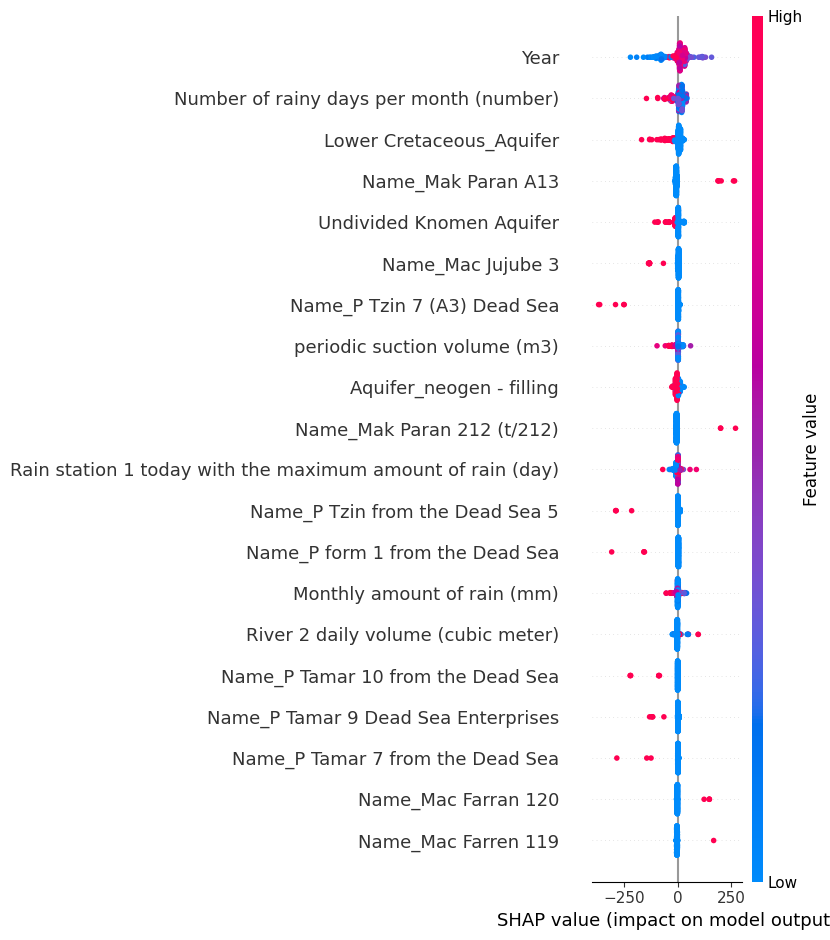

In [70]:
import shap

# Explain the model predictions using SHAP
explainer = shap.Explainer(model)
shap_values = explainer.shap_values(X_test, check_additivity=False)

# Visualize summary plot of SHAP values for all predictions
shap.summary_plot(shap_values, X_test)

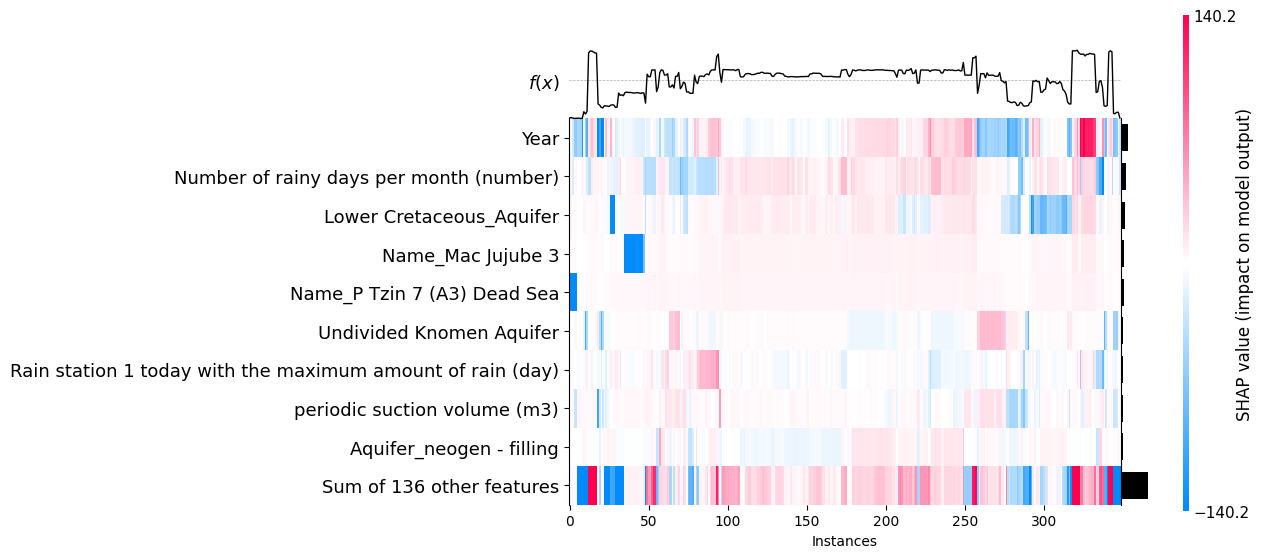

In [72]:
# compute SHAP values
explainer = shap.Explainer(model, X_test)
shap_values = explainer(X_test, check_additivity=False)
shap.plots.heatmap(shap_values)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


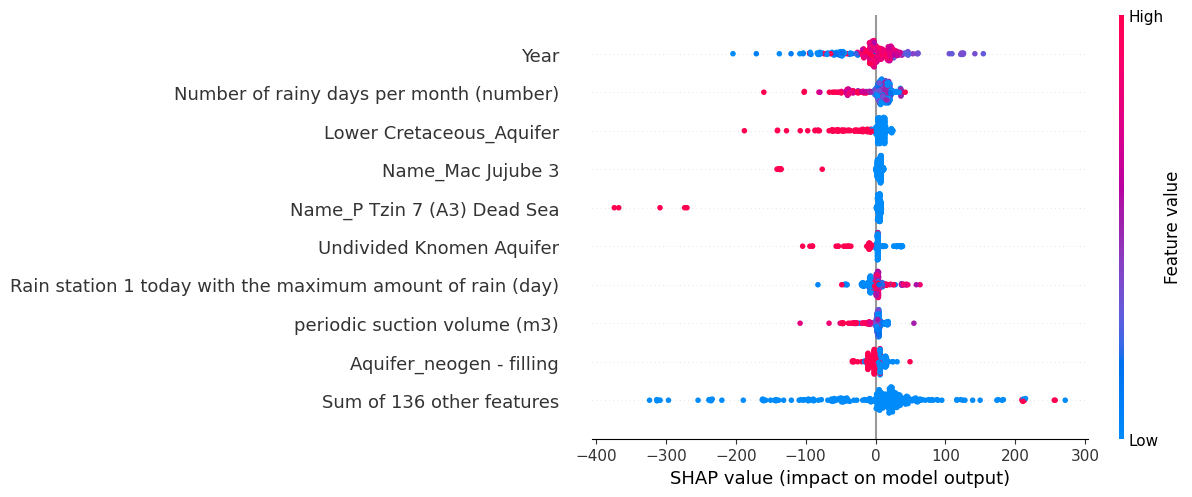

In [73]:
shap.plots.beeswarm(shap_values)

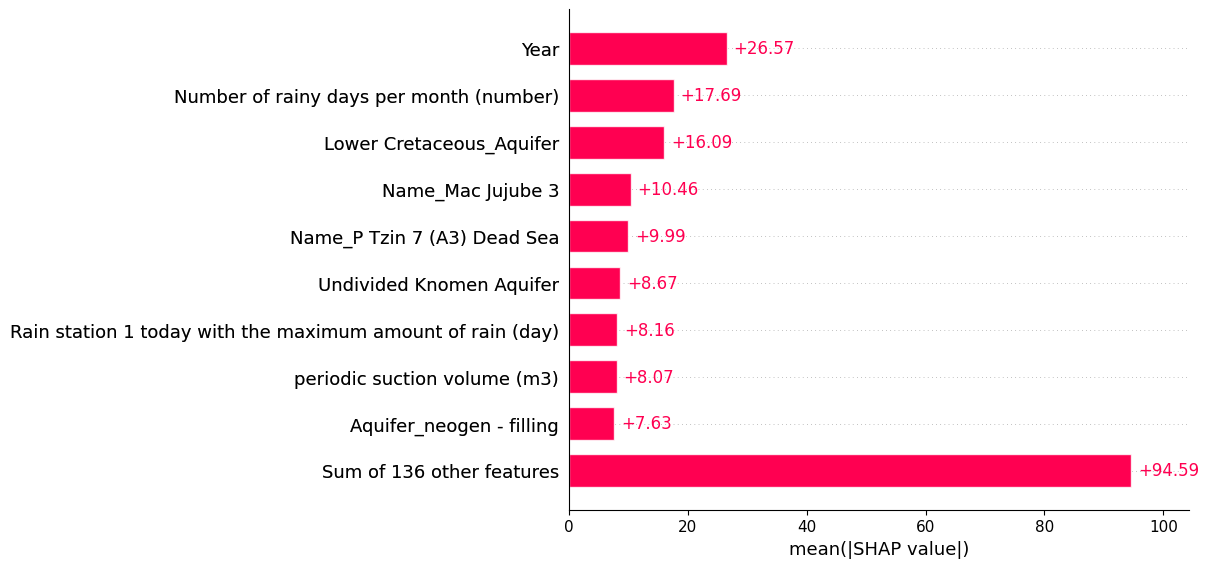

In [74]:
shap.plots.bar(shap_values)

### SHAP on RandomForestRegressor:

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


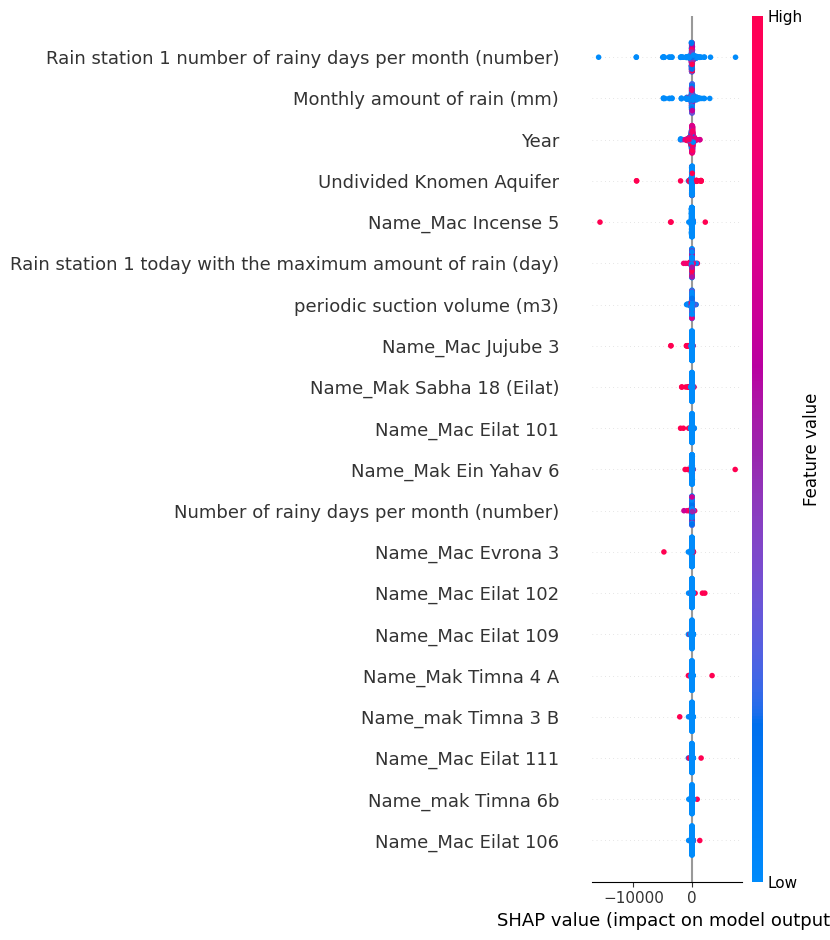

In [87]:
import shap

# Explain the model predictions using SHAP
explainer_rf = shap.Explainer(rf_model)
shap_values_rf = explainer_rf.shap_values(X_test, check_additivity=False)

# Visualize summary plot of SHAP values for all predictions
shap.summary_plot(shap_values_rf, X_test)

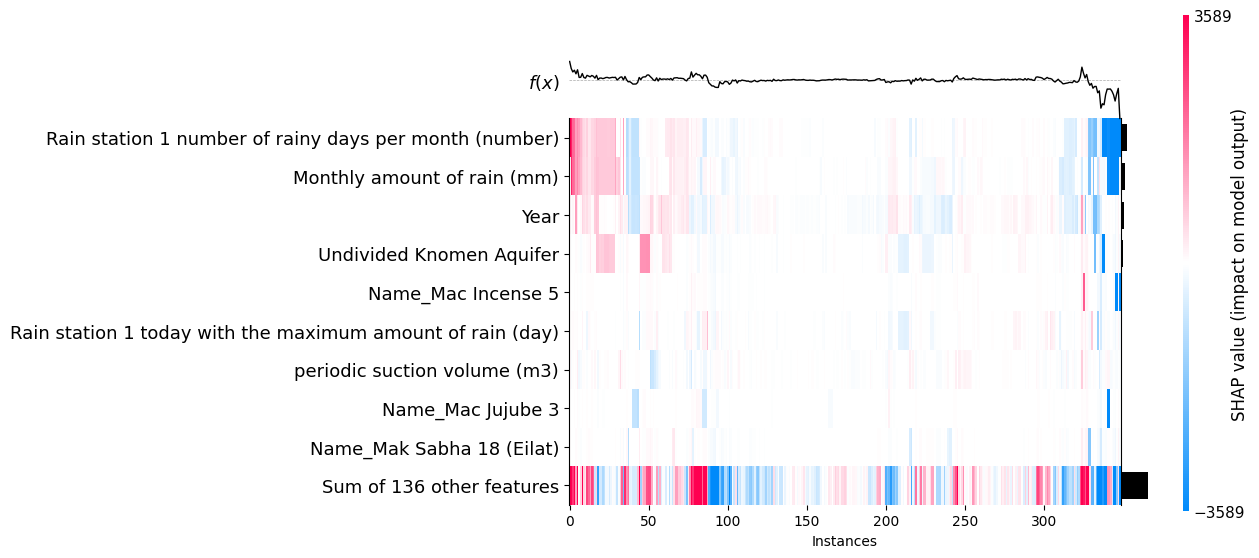

In [89]:
# compute SHAP values
# explainer = shap.Explainer(rf_model, X_test)
shap_values_rf = explainer_rf(X_test, check_additivity=False)
shap.plots.heatmap(shap_values_rf)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


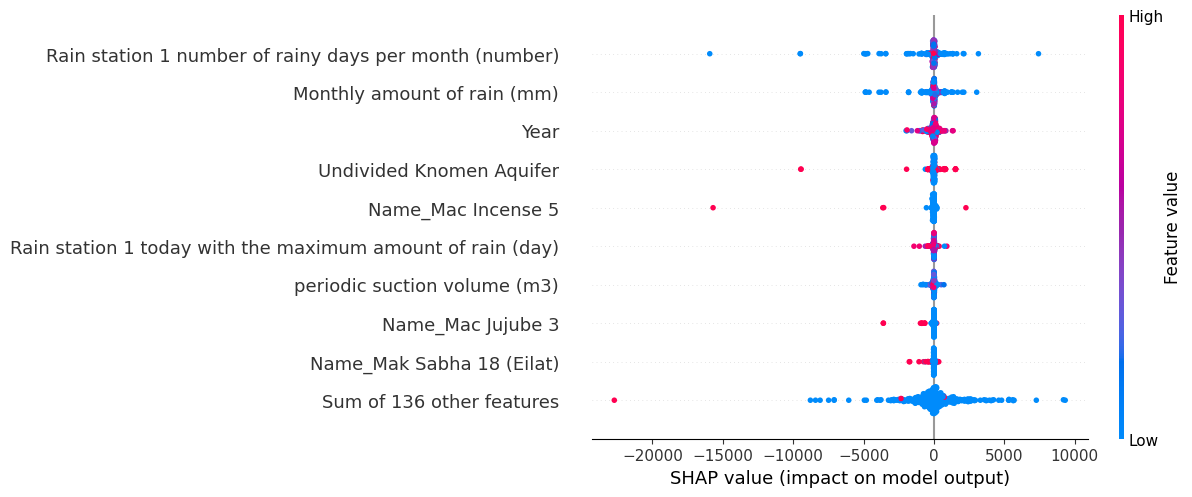

In [90]:
shap.plots.beeswarm(shap_values_rf)

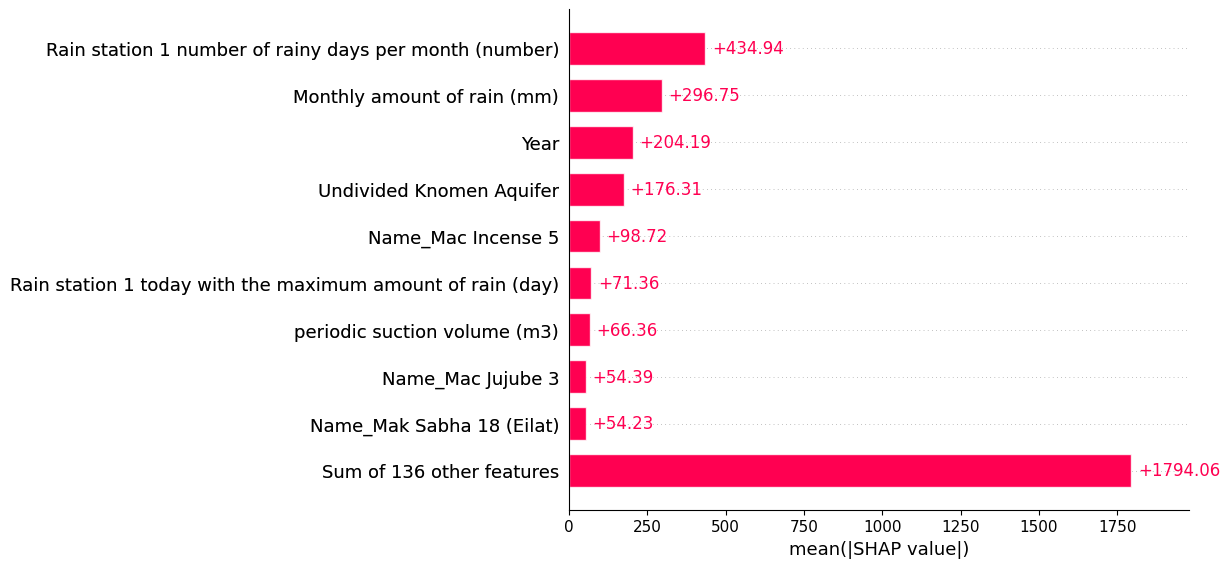

In [91]:
shap.plots.bar(shap_values_rf)